# SweetEscape Customer Segmentation

The data we are going to use is a **Purchase History** from a SweetEscape. <br>
SweetEscape is an **AI-based photography company** that offers **photography services for any occasion**.<br>
Founded back in 2016, now we have more than **2000+ photographers** accross **500+ different city**.<br>
We offer our **photography service** on **hourly package** where you will get **100+ edited photos** and up to **40 downloadable photos**.

# Task

- We are asked to **cluster the customer** based on their purchase history
- We are asked to give **insights and reccomendation** based on cluster that we have made

# Objective

Our objective is to make **customer loyalty program** based onn the insights we got.

# Model Used

The model we are going to use for clustering is **RFM Model** and try to compare with **KMeans**<br>
**RFM** is a method used for **analyzing customer value**. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries. <br><br>
**RFM** stands for the three dimensions: 
- Recency – How recently did the customer purchase?
- Frequency – How often do they purchase?
- Monetary Value – How much do they spend? 

**KMeans** clustering is a method of vector quantization, originally from signal processing, that aims to partition and observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

# IPYNB Flow

1. Data Pre-processing
1. EDA : Visualization, Distribution and Normality 
1. Machine Learning
    1. FM Model
    1. RFM Model
    1. Insights and reccomendations
    1. Machine Learning Visualization
    1. K-Means
1. Conclusion

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import warnings
import os
import iplot
import math
import time, warnings
import datetime as dte
import jenkspy
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler,StandardScaler
from scipy import stats
from sklearn import preprocessing

In [2]:
#Import data with semicolon seperator

df = pd.read_csv('testt.csv', sep=";")

## Data pre-processing

In [3]:
#Checking dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49127 entries, 0 to 49126
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   User Name                         49127 non-null  object 
 1   Email                             49127 non-null  object 
 2   Gender                            21639 non-null  object 
 3   Nationality                       49032 non-null  object 
 4   Year of Birthday                  18909 non-null  float64
 5   Country Name                      49127 non-null  object 
 6   City Name                         49127 non-null  object 
 7   Tags Occasion                     37687 non-null  object 
 8   Promo Name (Dim New Promos Tags)  49127 non-null  object 
 9   Order Code                        49127 non-null  object 
 10  Year of Date order                49127 non-null  int64  
 11  Month Name Abbreviated            49127 non-null  object 
dtypes: f

Columns info:
1. **Username**: Customer Name
1. **Email**: Customer Email
1. **Gender**: Customer Gender
1. **Nationality**: Customer Nationality (recorded using abbrevation, Ex: ID, PH, SG)
1. **Country Name**: The country where customer use the service
1. **City Name**: The city where customer use the service
1. **Tags Occasion** What kind of occasion that customer are celebrating (Ex: Holiday, Honeymoon, Graduation, Birtday)
1. **Promo Name (Dim New Promos Tags)**: The name of promotion code that customer used. '0' Means no promo used.
1. **Order Code**: Unique code for each order made
1. **Year of Date order**: Year when the customer made the order
1. **Month Name Abbreviated**: Month when the customer made the order

In [4]:
#Assigning Unique ID to every Customer based on their email 


df = df.assign(Cust_id=(df['Email']).astype('category').cat.codes)

The reason on why we use **'Email'** instead of **'User Name'** is because some customer might have the same name, but  **email is unique**.

In [5]:
#Deleting coloumns that contains private informations

df = df.drop(columns=['User Name','Gender','Email','Order Code','Year of Birthday'])

In [6]:
df

Nationality Country Name  City Name     Tags Occasion  \
0              ID    Indonesia    Jakarta               NaN   
1              ID    Singapore  Singapore           holiday   
2              ID    Australia     Sydney  special-occasion   
3              ID    Indonesia    Jakarta               NaN   
4              ID    Australia  Melbourne           holiday   
...           ...          ...        ...               ...   
49122          CN    Indonesia       Bali           holiday   
49123          CN  South Korea      Seoul           holiday   
49124          JP    Indonesia       Bali           holiday   
49125          JP    Indonesia    Jakarta           holiday   
49126          JP    Indonesia       Bali           holiday   

                      Promo Name (Dim New Promos Tags)  Year of Date order  \
0                         Hospital - RSPI Pondok Indah                2020   
1                                                    0                2019   
2                                                    0                2018   
3                                 Hospital - RSPI Puri                2020   
4        Partnership - Booking for Dwidaya Group Tour                 2018   
...                                                ...                 ...   
49122  Influencer 10% Off Promo Code - Febby Gabriella                2020   
49123                                     Airbnb Seoul                2020   
49124                                                0                2019   
49125                                                0                2019   
49126                                                0                2020   

      Month Name Abbreviated  Cust_id  
0                        Aug     2997  
1                        Feb     4083  
2                        Nov     5406  
3                        Apr     6320  
4                        Nov    18919  
...                      ...      ...  
49122                    Mar    31550  
49123                    Jan    17513  
49124                    Feb    15472  
49125                    Mar    15472  
49126                    Mar      835  

[49127 rows x 8 columns]

As you can see, there are several variables in this dataset that are a **categorical variable**. RFM algorithm isn't **directly applicable** to categorical variables its not quantifiable. However there are some variables such as **Country Name and Promo Name** that **might help** us get a better result.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49127 entries, 0 to 49126
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Nationality                       49032 non-null  object
 1   Country Name                      49127 non-null  object
 2   City Name                         49127 non-null  object
 3   Tags Occasion                     37687 non-null  object
 4   Promo Name (Dim New Promos Tags)  49127 non-null  object
 5   Year of Date order                49127 non-null  int64 
 6   Month Name Abbreviated            49127 non-null  object
 7   Cust_id                           49127 non-null  int16 
dtypes: int16(1), int64(1), object(6)
memory usage: 2.7+ MB


In [8]:
#Assigning ID to Nationality

df = df.assign(Nationality_id = (df['Nationality']).astype('category').cat.codes)

In [9]:
#Changing Column Promo Name

df = df.rename(columns={'Promo Name (Dim New Promos Tags)': 'Promo_name'})

In [10]:
#Adding Frequency Coloumn
df['Frequency'] = 1

In [11]:
#Assigning Values to Promo_name

df['Promo_id'] = df['Promo_name'].apply(lambda x: 2 if x == '0' else 1)

In [12]:
df

Nationality Country Name  City Name     Tags Occasion  \
0              ID    Indonesia    Jakarta               NaN   
1              ID    Singapore  Singapore           holiday   
2              ID    Australia     Sydney  special-occasion   
3              ID    Indonesia    Jakarta               NaN   
4              ID    Australia  Melbourne           holiday   
...           ...          ...        ...               ...   
49122          CN    Indonesia       Bali           holiday   
49123          CN  South Korea      Seoul           holiday   
49124          JP    Indonesia       Bali           holiday   
49125          JP    Indonesia    Jakarta           holiday   
49126          JP    Indonesia       Bali           holiday   

                                            Promo_name  Year of Date order  \
0                         Hospital - RSPI Pondok Indah                2020   
1                                                    0                2019   
2                                                    0                2018   
3                                 Hospital - RSPI Puri                2020   
4        Partnership - Booking for Dwidaya Group Tour                 2018   
...                                                ...                 ...   
49122  Influencer 10% Off Promo Code - Febby Gabriella                2020   
49123                                     Airbnb Seoul                2020   
49124                                                0                2019   
49125                                                0                2019   
49126                                                0                2020   

      Month Name Abbreviated  Cust_id  Nationality_id  Frequency  Promo_id  
0                        Aug     2997              43          1         1  
1                        Feb     4083              43          1         2  
2                        Nov     5406              43          1         2  
3                        Apr     6320              43          1         1  
4                        Nov    18919              43          1         1  
...                      ...      ...             ...        ...       ...  
49122                    Mar    31550              19          1         1  
49123                    Jan    17513              19          1         1  
49124                    Feb    15472              53          1         2  
49125                    Mar    15472              53          1         2  
49126                    Mar      835              53          1         2  

[49127 rows x 11 columns]

The reason why we **gave values** to the Promo is because customer that did not use a promo when purchasing the service is consider **more valuable** as it bring more profit to the company

In [13]:
#Changing Year Name Column

df = df.rename(columns={'Year of Date order': 'Year'})
df['Year'].apply(str)

0        2020
1        2019
2        2018
3        2020
4        2018
         ... 
49122    2020
49123    2020
49124    2019
49125    2019
49126    2020
Name: Year, Length: 49127, dtype: object

In [14]:
#Changing Month Name Column

df = df.rename(columns={'Month Name Abbreviated': 'Month'})

months_map = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12',}
def mapper(month):
    return months_map[month]

df['Month'] = df['Month'].apply(mapper)

In [15]:
#Combining Month, and Year column

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

Since we dont have data on the exact purchase date lets just assign the first day 

In [16]:
#Adding Column Recency

now = dte.date(2019,12,30)
df['Date'] = pd.DatetimeIndex(df['Date']).date
df['Recency'] = df['Date'].apply(lambda x: (now - x).days)

In [17]:
df

Nationality Country Name  City Name     Tags Occasion  \
0              ID    Indonesia    Jakarta               NaN   
1              ID    Singapore  Singapore           holiday   
2              ID    Australia     Sydney  special-occasion   
3              ID    Indonesia    Jakarta               NaN   
4              ID    Australia  Melbourne           holiday   
...           ...          ...        ...               ...   
49122          CN    Indonesia       Bali           holiday   
49123          CN  South Korea      Seoul           holiday   
49124          JP    Indonesia       Bali           holiday   
49125          JP    Indonesia    Jakarta           holiday   
49126          JP    Indonesia       Bali           holiday   

                                            Promo_name  Year Month  Cust_id  \
0                         Hospital - RSPI Pondok Indah  2020    08     2997   
1                                                    0  2019    02     4083   
2                                                    0  2018    11     5406   
3                                 Hospital - RSPI Puri  2020    04     6320   
4        Partnership - Booking for Dwidaya Group Tour   2018    11    18919   
...                                                ...   ...   ...      ...   
49122  Influencer 10% Off Promo Code - Febby Gabriella  2020    03    31550   
49123                                     Airbnb Seoul  2020    01    17513   
49124                                                0  2019    02    15472   
49125                                                0  2019    03    15472   
49126                                                0  2020    03      835   

       Nationality_id  Frequency  Promo_id        Date  Recency  
0                  43          1         1  2020-08-01     -215  
1                  43          1         2  2019-02-01      332  
2                  43          1         2  2018-11-01      424  
3                  43          1         1  2020-04-01      -93  
4                  43          1         1  2018-11-01      424  
...               ...        ...       ...         ...      ...  
49122              19          1         1  2020-03-01      -62  
49123              19          1         1  2020-01-01       -2  
49124              53          1         2  2019-02-01      332  
49125              53          1         2  2019-03-01      304  
49126              53          1         2  2020-03-01      -62  

[49127 rows x 13 columns]

We are calculating **how many days have passed** since their **last order** to the end of 2019

In [18]:
#Assigning Values to Country Name

df['Country_booked_id'] = df['Country Name'].apply(lambda x : 1 if (
    x == 'Indonesia' or x == 'Singapore' or x== 'Philippines') else 2)

The reason why we **gave values** to the Country Name is similar with Promo Name, its because customer that booked the service outside from Indonesia, Singapore, and Philippines is consider **more valuable** as it bring more profit to the company

In [19]:
#Creating seperate dataset that are clean (without dummies)

df_new = df.copy()
df_new = df_new[~df_new.Promo_name.str.contains("Tour")].reset_index(drop=True)
df_new = df_new[~df_new.Promo_name.str.contains("Grab")].reset_index(drop=True)
df_new = df_new[~df_new.Promo_name.str.contains("Group")].reset_index(drop=True)
df_new = df_new[~df_new.Promo_name.str.contains("Antavaya")].reset_index(drop=True)
df_new = df_new[~df_new.Promo_name.str.contains("B2B")].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 11854].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 9290].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 23225].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 6063].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 5442].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 8314].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 18187].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 24939].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 8067].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 12571].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 15324].reset_index(drop=True)
df_new = df_new[df_new.Cust_id != 17200].reset_index(drop=True)

In [20]:
#Deleting some coloumns that contains categorical variable and no longer needed

df = df.drop(columns=['City Name','Promo_name','Tags Occasion'])
df_new = df_new.drop(columns=['City Name','Promo_name','Tags Occasion'])

We are keeping Nationality, Country Name, and Month Name Abbreviated so we can **refer back** to it later on

In [21]:
#Checking whether we have a missing value or no

df.isna().sum()
df_new.isna().sum()

Nationality          95
Country Name          0
Year                  0
Month                 0
Cust_id               0
Nationality_id        0
Frequency             0
Promo_id              0
Date                  0
Recency               0
Country_booked_id     0
dtype: int64

In [22]:
df_new.shape

(42603, 11)

Out of 42603 rows, we only have 95 data that dont have Nationality, we will proceed to **drop** that data since its only **0.2%** of our total data.

In [23]:
#Dropping the missing value

df.dropna(inplace=True)
df_new.dropna(inplace=True)

In [24]:
#Adding Column Monetary(Score) based on sum

df['Score'] = df['Promo_id'] + df['Country_booked_id']
df_new['Score'] = df_new['Promo_id'] + df_new['Country_booked_id']

The column **Score is needed** because we want to know how many Scores that a customer have, **the higher the better**

In [25]:
#Changing Column Country Name

df = df.rename(columns={'Country Name': 'Country_booked'})
df_new = df_new.rename(columns={'Country Name': 'Country_booked'})

We are **renaming** the column to **avoid confusion.**

Now that our data has been pre-processed, we will continue to the next step.

## EDA

In this section we will do **visualization** of our data

In [26]:
df_new

Nationality Country_booked  Year Month  Cust_id  Nationality_id  \
0              ID      Indonesia  2020    08     2997              43   
1              ID      Singapore  2019    02     4083              43   
2              ID      Australia  2018    11     5406              43   
3              ID      Indonesia  2020    04     6320              43   
4              ID      Indonesia  2019    10    10310              43   
...           ...            ...   ...   ...      ...             ...   
42598          CN      Indonesia  2020    03    31550              19   
42599          CN    South Korea  2020    01    17513              19   
42600          JP      Indonesia  2019    02    15472              53   
42601          JP      Indonesia  2019    03    15472              53   
42602          JP      Indonesia  2020    03      835              53   

       Frequency  Promo_id        Date  Recency  Country_booked_id  Score  
0              1         1  2020-08-01     -215                  1      2  
1              1         2  2019-02-01      332                  1      3  
2              1         2  2018-11-01      424                  2      4  
3              1         1  2020-04-01      -93                  1      2  
4              1         1  2019-10-01       90                  1      2  
...          ...       ...         ...      ...                ...    ...  
42598          1         1  2020-03-01      -62                  1      2  
42599          1         1  2020-01-01       -2                  2      3  
42600          1         2  2019-02-01      332                  1      3  
42601          1         2  2019-03-01      304                  1      3  
42602          1         2  2020-03-01      -62                  1      3  

[42508 rows x 12 columns]

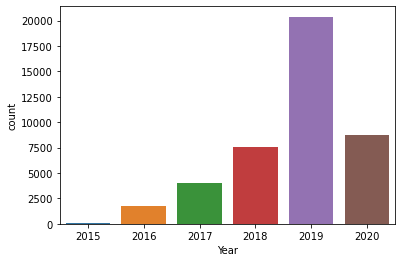

In [27]:
#We are plotting which year have the highest order

ax = sns.countplot(x="Year", data=df_new)

In [28]:
#Looking which year have the highest purchase so we can use that year for our model

df_new['Year'].value_counts()

2019    20376
2020     8731
2018     7537
2017     3997
2016     1761
2015      106
Name: Year, dtype: int64

As we can see, **2019** is the year with **most bookings**, therefore we will build our **model based on 2019 data**. As most of company practice, they measure customer **RFM annualy**, therefore we will follow this.

In [29]:
#Selecting the 2019 dataset

year = df['Year'] == 2019
df_1 = df[year]

year_new = df_new['Year'] == 2019
df_1_new = df_new[year_new]

In [30]:
#Selecting Lastest Recency Data

recency_df = df_1_new.groupby(by='Cust_id', as_index=False)['Recency'].max()
recency_df.columns = ['Cust_id','Recency']
recency_df.head()

Cust_id  Recency
0        1       59
1        2      363
2        5       90
3        7       29
4        9       29

In [31]:
df_1_new

Nationality Country_booked  Year Month  Cust_id  Nationality_id  \
1              ID      Singapore  2019    02     4083              43   
4              ID      Indonesia  2019    10    10310              43   
6              ID            USA  2019    01    10653              43   
7              ID            USA  2019    12    10653              43   
8              ID            USA  2019    01    10653              43   
...           ...            ...   ...   ...      ...             ...   
42594          CN    South Korea  2019    12       44              19   
42596          JP          Japan  2019    12    28675              53   
42597          CN      Australia  2019    12       10              19   
42600          JP      Indonesia  2019    02    15472              53   
42601          JP      Indonesia  2019    03    15472              53   

       Frequency  Promo_id        Date  Recency  Country_booked_id  Score  
1              1         2  2019-02-01      332                  1      3  
4              1         1  2019-10-01       90                  1      2  
6              1         2  2019-01-01      363                  2      4  
7              1         2  2019-12-01       29                  2      4  
8              1         2  2019-01-01      363                  2      4  
...          ...       ...         ...      ...                ...    ...  
42594          1         1  2019-12-01       29                  2      3  
42596          1         1  2019-12-01       29                  2      3  
42597          1         1  2019-12-01       29                  2      3  
42600          1         2  2019-02-01      332                  1      3  
42601          1         2  2019-03-01      304                  1      3  

[20376 rows x 12 columns]

In [32]:
#Calculating the sum of Score based on their customer ID

df_comb = df_1.groupby(['Cust_id','Year','Nationality_id','Country_booked','Nationality']).sum().copy()
df_comb = df_comb.reset_index()

df_comb_new = df_1_new.groupby(['Cust_id','Year','Nationality_id','Country_booked','Nationality']).sum().copy()
df_comb_new = df_comb_new.reset_index()

In [33]:
df_comb_new

Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
0            1  2019              43          Japan          ID          1   
1            2  2019              43            USA          ID          1   
2            5  2019             103            USA          US          1   
3            7  2019              53            USA          JP          1   
4            9  2019              43      Indonesia          ID          2   
...        ...   ...             ...            ...         ...        ...   
18962    32549  2019              81         France          PH          1   
18963    32550  2019              43      Indonesia          ID          1   
18964    32552  2019              93      Indonesia          SG          1   
18965    32553  2019              43      Singapore          ID          1   
18966    32555  2019              93      Indonesia          SG          1   

       Promo_id  Recency  Country_booked_id  Score  
0             2       59                  2      4  
1             1      363                  2      3  
2             1       90                  2      3  
3             1       29                  2      3  
4             2       58                  2      4  
...         ...      ...                ...    ...  
18962         1      243                  2      3  
18963         2       29                  1      3  
18964         2      151                  1      3  
18965         1      182                  1      2  
18966         2       29                  1      3  

[18967 rows x 10 columns]

As stated before, the **higher** the **Score** the more **profit** customer give to company

### Checking how many customer that do repeat order

In [34]:
total_rows1 = df_1_new.shape[0]
total_rows2 = df_comb_new.shape[0]

print('Number of Costumer that do repeat order: ' + str(total_rows1-total_rows2))

Number of Costumer that do repeat order: 1409


As we can see, we will try to focus to **cluster** the customer **based on their score**, if customer do a **repeat order**, we can say that they probably will have **higher score** than the customer that don't do repeat order

In [35]:
# #Preparing the Nationality dataset for inner join (and remove duplicates)

# join1 = df_1[['Nationality_id','Nationality']].copy()
# join1.drop_duplicates(inplace=True)

# join1_new = df_1_new[['Nationality_id','Nationality']].copy()
# join1_new.drop_duplicates(inplace=True)

In [36]:
# #Preparing the Country_booked dataset for inner join (and remove duplicates)

# join2 = df_1[['Country_booked_id','Country_booked']].copy()
# join2.drop_duplicates(inplace=True)

# join2_new = df_1_new[['Country_booked_id','Country_booked']].copy()
# join2_new.drop_duplicates(inplace=True)

In [37]:
# #Joining Nationality to df_comb dataset

# inner_join = pd.merge(df_comb,
#                       join1,
#                       on ='Nationality_id',  
#                       how ='inner') 
# df_comb = inner_join.copy()

# inner_join_new = pd.merge(df_comb_new,  
#                       join1_new,  
#                       on ='Nationality_id',  
#                       how ='inner') 
# df_comb_new = inner_join_new.copy()

In [38]:
# #Joining Country_booked to df_comb dataset

# inner_join2 = pd.merge(df_comb,  
#                       join2,  
#                       on ='Country_booked_id',  
#                       how ='inner') 
# df_comb = inner_join2.copy()

# inner_join2_new = pd.merge(df_comb_new,  
#                       join2_new,  
#                       on ='Country_booked_id',  
#                       how ='inner') 
# df_comb_new = inner_join2_new.copy()

#### Looking for unusual data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


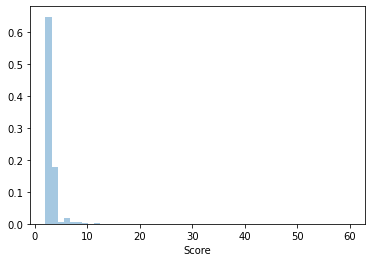

In [39]:
#Checking skewness of the data

sns.distplot(df_comb_new['Score'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


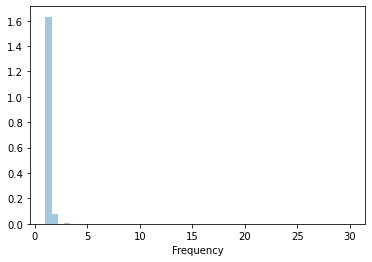

In [40]:
#Checking skewness of the data

sns.distplot(df_comb_new['Frequency'])

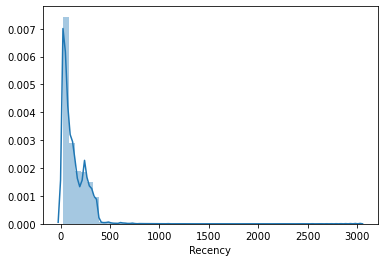

In [41]:
#Checking skewness of the data

sns.distplot(df_comb_new['Recency'])

Looking from the plot above, we can **most certainly** say that the data **have outlier**. <br>
But its okay we **won't remove the outlier**.<br>
The **reason** behind this is because that show there are some customer that are **very loyal** to the company.

In [42]:
df_comb_new = df_comb_new.sort_values(by='Frequency', ascending=False)
df_comb_new

Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
11804    20291  2019              93      Indonesia          SG         30   
3251      5482  2019              43      Indonesia          ID         29   
7600     13112  2019              43      Indonesia          ID         28   
5747      9903  2019              43      Indonesia          ID         15   
6803     11738  2019              81         France          PH         13   
...        ...   ...             ...            ...         ...        ...   
6473     11175  2019              43    South Korea          ID          1   
6472     11171  2019              43      Indonesia          ID          1   
6471     11169  2019              93      Indonesia          SG          1   
6470     11168  2019              43         France          ID          1   
18966    32555  2019              93      Indonesia          SG          1   

       Promo_id  Recency  Country_booked_id  Score  
11804        30      870                 30     60  
3251         29     2548                 29     58  
7600         28      812                 28     56  
5747         15      435                 15     30  
6803         13     2204                 26     39  
...         ...      ...                ...    ...  
6473          1       29                  2      3  
6472          2      273                  1      3  
6471          1      120                  1      2  
6470          1      212                  2      3  
18966         2       29                  1      3  

[18967 rows x 10 columns]

In [43]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(df_comb_new):
    result = {'Anderson' : {i:j for i,j in zip(anderson(df_comb_new)[2], anderson(df_comb_new)[1])}, 
              'Shapiro': shapiro(df_comb_new)[1], 
     'K^2': normaltest(df_comb_new)[1]}
    result['Anderson']['stat'] = anderson(df_comb_new)[0]
    return result

In [44]:
try_normal(df_comb_new['Score'])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 2097.814627318472},
 'Shapiro': 0.0,
 'K^2': 0.0}

H0: Score data have normal distribution <br>
H1: Score data have abnormal distribution

With SI 0.05:
1. Anderson: 2097.814627318472 > 0.787 - reject H0
2. Shapiro: 0.0 < 0.05 - reject H0
3. K^2: 0.0 < 0.05 - reject H0

Conclusion: With CI 95%, Score data have **abnormal distribution**.

In [45]:
try_normal(df_comb_new['Frequency'])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 6178.429497101453},
 'Shapiro': 0.0,
 'K^2': 0.0}

H0: Frequency data have normal distribution <br>
H1: Frequency data have abnormal distribution

With SI 0.05:
1. Anderson: 6178.429497101453 > 0.787 - reject H0
2. Shapiro: 0.0 < 0.05 - reject H0
3. K^2: 0.0 < 0.05 - reject H0

Conclusion: With CI 95%, Frequency data have **abnormal distribution**.

In [46]:
try_normal(df_comb_new['Recency'])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 884.6409488329409},
 'Shapiro': 0.0,
 'K^2': 0.0}

H0: Recency data have normal distribution <br>
H1: Recency data have abnormal distribution

With SI 0.05:
1. Anderson: 884.6409488329409 > 0.787 - reject H0
2. Shapiro: 0.0 < 0.05 - reject H0
3. K^2: 0.0 < 0.05 - reject H0

Conclusion: With CI 95%, Frequency data have **abnormal distribution**.

### Nationality Pieplot

<Figure size 432x288 with 0 Axes>

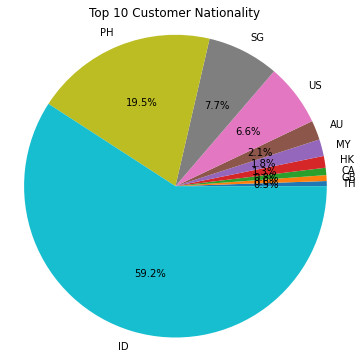

In [47]:
#Creating Nationality dataset for pieplot

datapie = df_comb_new[['Nationality','Score']].copy()
datapie['Count'] = 1
datapie.drop(['Score'], axis=1, inplace=True)
datapie = datapie.groupby(['Nationality']).sum()
datapie = datapie.reset_index()

datapie10 = datapie.sort_values('Count').tail(10).copy()

fig = plt.figure()

plt.figure(figsize=(6,6))
my_data = datapie10['Count']
my_labels = datapie10['Nationality']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Top 10 Customer Nationality')
plt.axis('equal')
# plt.savefig('custN.png')
plt.show()


Looking at the data **shown above**, we know that top 10 customer came from:
1. ID = Indonesia
1. PH = Philippines
1. SG = Singapore
1. US = United States of America
1. AU = Australia
1. MY = Malaysia
1. HK = Hong Kong
1. CA = Canada
1. GB = United Kingdom
1. TH = Thailand

### Country Booked Pieplot

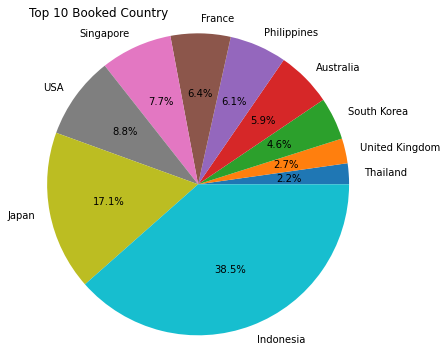

In [48]:
#Creating Country Booked dataset for pieplot

datapiec = df_comb_new[['Country_booked','Score']].copy()
datapiec['Count'] = 1
datapiec.drop(['Score'], axis=1, inplace=True)
datapiec = datapiec.groupby(['Country_booked']).sum()
datapiec = datapiec.reset_index()

datapiec10 = datapiec.sort_values('Count').tail(10).copy()

plt.figure(figsize=(6,6))
my_data = datapiec10['Count']
my_labels = datapiec10['Country_booked']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Top 10 Booked Country',loc='left')
plt.axis('equal')
# plt.savefig('CustD.png',bbox_inches = "tight")
plt.show()

Looking at the data **shown above**, we know that top 10 customer destination are:
1. Indonesia
1. Japan
1. United States of America
1. Singapore
1. France
1. Philippines
1. Australia
1. South Korea
1. United Kingdom
1. Thailand

<Figure size 432x288 with 0 Axes>

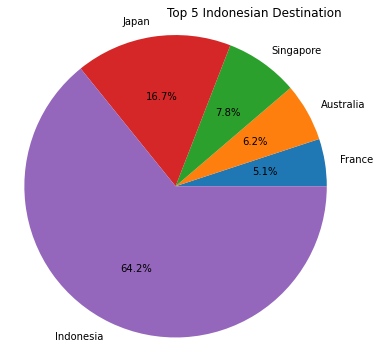

In [49]:
#Creating Nationality ID dataset for pieplot

datapie = df_comb_new[['Nationality','Country_booked','Score']].copy()
datapie = datapie[datapie['Nationality']=='ID']
datapie['Count'] = 1
datapie.drop(['Score','Nationality'], axis=1, inplace=True)
datapie = datapie.groupby(['Country_booked']).sum()
datapie = datapie.reset_index()

datapie10 = datapie.sort_values('Count').tail(5).copy()

fig = plt.figure()

plt.figure(figsize=(6,6))
my_data = datapie10['Count']
my_labels = datapie10['Country_booked']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Top 5 Indonesian Destination',loc='right')
plt.axis('equal')
# plt.savefig('custID.png')
plt.show()



<Figure size 432x288 with 0 Axes>

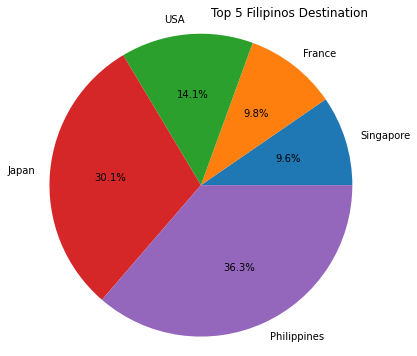

In [50]:
#Creating Nationality PH dataset for pieplot

datapie = df_comb_new[['Nationality','Country_booked','Score']].copy()
datapie = datapie[datapie['Nationality']=='PH']
datapie['Count'] = 1
datapie.drop(['Score','Nationality'], axis=1, inplace=True)
datapie = datapie.groupby(['Country_booked']).sum()
datapie = datapie.reset_index()

datapie10 = datapie.sort_values('Count').tail(5).copy()

fig = plt.figure()

plt.figure(figsize=(6,6))
my_data = datapie10['Count']
my_labels = datapie10['Country_booked']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Top 5 Filipinos Destination',loc='right')
plt.axis('equal')
# plt.savefig('custPH.png')
plt.show()




By knowing **where majority** of our costumer booked us, we will be able to formulate more **tailored promotions and products** to our customer.

In [51]:
#Creating Age Demographic dataset for pieplot

# datapiec = dfv[['Age','Email']].copy()
# datapiec['Count'] = 1
# datapiec.drop(['Email'], axis=1, inplace=True)
# datapiec = datapiec.groupby(['Age']).sum()
# datapiec = datapiec.reset_index()

# datapiec10 = datapiec.sort_values('Count').tail(10).copy()

# plt.figure(figsize=(8,8))
# my_data = datapiec10['Count']
# my_labels = datapiec10['Age']
# plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
# plt.title('Demographic',loc='left')
# plt.axis('equal')
# # plt.savefig('CustA.png',bbox_inches = "tight")
# plt.show()

In [52]:
#Creating Gender Demographic dataset for pieplot

# datapiec = dfv[['Age','Gender']].copy()
# datapiec['Count'] = 1
# datapiec.drop(['Gender'], axis=1, inplace=True)
# datapiec = datapiec.groupby(['Gender']).sum()
# datapiec = datapiec.reset_index()

# datapiec10 = datapiec.sort_values('Count').tail(10).copy()

# plt.figure(figsize=(8,8))
# my_data = datapiec10['Count']
# my_labels = datapiec10['Gender']
# plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
# plt.title('Demographic',loc='left')
# plt.axis('equal')
# # plt.savefig('CustG.png',bbox_inches = "tight")
# plt.show()

## Machine Learning RFM

RFM is a method used for **analyzing customer value**. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.  <br>
RFM stands for the **three dimensions**:  <br>
- Recency – How recently did the customer purchase? 
- Frequency – How often do they purchase? 
- Monetary Value – How much do they spend?
<br><br>
As we dont have the actual data on **customer spending**, we will refer to the **Score** we have made.

In [53]:
df_comb_new

Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
11804    20291  2019              93      Indonesia          SG         30   
3251      5482  2019              43      Indonesia          ID         29   
7600     13112  2019              43      Indonesia          ID         28   
5747      9903  2019              43      Indonesia          ID         15   
6803     11738  2019              81         France          PH         13   
...        ...   ...             ...            ...         ...        ...   
6473     11175  2019              43    South Korea          ID          1   
6472     11171  2019              43      Indonesia          ID          1   
6471     11169  2019              93      Indonesia          SG          1   
6470     11168  2019              43         France          ID          1   
18966    32555  2019              93      Indonesia          SG          1   

       Promo_id  Recency  Country_booked_id  Score  
11804        30      870                 30     60  
3251         29     2548                 29     58  
7600         28      812                 28     56  
5747         15      435                 15     30  
6803         13     2204                 26     39  
...         ...      ...                ...    ...  
6473          1       29                  2      3  
6472          2      273                  1      3  
6471          1      120                  1      2  
6470          1      212                  2      3  
18966         2       29                  1      3  

[18967 rows x 10 columns]

In [54]:
df_comb_fe = df_comb_new.copy()

In [55]:
df_comb_fe

Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
11804    20291  2019              93      Indonesia          SG         30   
3251      5482  2019              43      Indonesia          ID         29   
7600     13112  2019              43      Indonesia          ID         28   
5747      9903  2019              43      Indonesia          ID         15   
6803     11738  2019              81         France          PH         13   
...        ...   ...             ...            ...         ...        ...   
6473     11175  2019              43    South Korea          ID          1   
6472     11171  2019              43      Indonesia          ID          1   
6471     11169  2019              93      Indonesia          SG          1   
6470     11168  2019              43         France          ID          1   
18966    32555  2019              93      Indonesia          SG          1   

       Promo_id  Recency  Country_booked_id  Score  
11804        30      870                 30     60  
3251         29     2548                 29     58  
7600         28      812                 28     56  
5747         15      435                 15     30  
6803         13     2204                 26     39  
...         ...      ...                ...    ...  
6473          1       29                  2      3  
6472          2      273                  1      3  
6471          1      120                  1      2  
6470          1      212                  2      3  
18966         2       29                  1      3  

[18967 rows x 10 columns]

In [56]:
target = df_comb_fe[['Score','Frequency','Recency']]

# Data splitting for Train, Validation and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_comb_fe, target, test_size=0.2, random_state=42)

#_____ Checking shape ____
print(X_train.shape)
print(X_test.shape)

(15173, 10)
(3794, 10)


In [57]:
# Making copy of X_train data
X_train_copy = X_train.copy()

In [58]:
#Function for RFM Algorithm

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [59]:
quantiles = X_train.quantile(q=[0.25,0.5,0.75])
quantiles

Cust_id    Year  Nationality_id  Frequency  Promo_id  Recency  \
0.25   8109.0  2019.0            43.0        1.0       1.0     29.0   
0.50  16209.0  2019.0            43.0        1.0       1.0     90.0   
0.75  24271.0  2019.0            81.0        1.0       2.0    212.0   

      Country_booked_id  Score  
0.25                1.0    3.0  
0.50                2.0    3.0  
0.75                2.0    3.0

In [60]:
#Making new columns for F and M Quartile

rfm_segmentation = X_train
X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))

<ipython-input-60-4427688bbe4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
<ipython-input-60-4427688bbe4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))


As we can see, the **reason** we are **not using the recency**, is because we have **limit the data** to year 2019. <br> And we are heavily **focused** on the **frequency and score**.

In [61]:
#Giving F and M value to our data

rfm_segmentation['FMScore'] = rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

<ipython-input-61-33cdeaf7e576>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_segmentation['FMScore'] = rfm_segmentation.F_Quartile.map(str) \


Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
12082    20759  2019              16         Canada          CA          1   
5091      8756  2019              43      Indonesia          ID          1   
2930      4928  2019              81         France          PH          1   
11301    19423  2019              43         France          ID          1   
18674    32050  2019              56    South Korea          KR          1   

       Promo_id  Recency  Country_booked_id  Score  F_Quartile  M_Quartile  \
12082         1      243                  2      3           1           1   
5091          2      151                  1      3           1           1   
2930          1      304                  2      3           1           1   
11301         1      273                  2      3           1           1   
18674         1       29                  2      3           1           1   

      FMScore  
12082      11  
5091       11  
2930       11  
11301      11  
18674      11

In [62]:
#Looking at value counts of the FM Score of our data

rfm_segmentation['FMScore'].value_counts()

11    11423
14     2917
44      833
Name: FMScore, dtype: int64

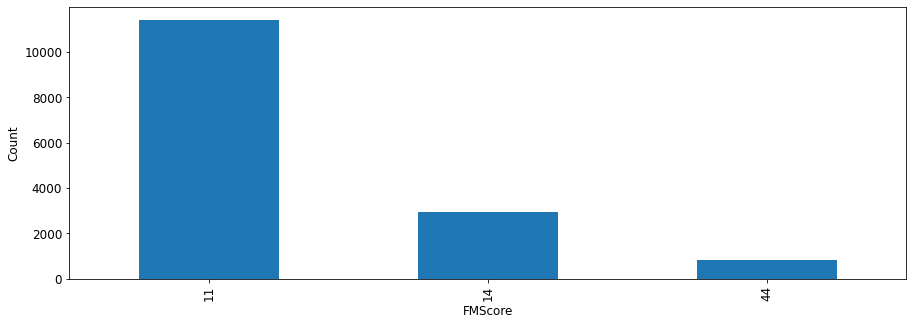

In [63]:
#Segmentation visualization

ax = rfm_segmentation['FMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("FMScore", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm1')
plt.show()

Based on **FM model** that we just did, we can see that the **F and M** score is only consist of **4 and 1**. <br>
A result like this happened because we have **abnormal data distribution**. <br>
Result like this **doesn't really show the segmentation**, our goal is to make a **good segmentation** of the customer, therefore we need to do a **Feature Engineering** to our data to get a **better result**

## Feature Engineering

In [64]:
#Checking our data distribution based on their Frequency

X_train['Frequency'].value_counts()

1     14340
2       713
3        80
4        13
5        12
9         4
7         2
13        2
10        2
8         2
6         1
29        1
28        1
Name: Frequency, dtype: int64

In [65]:
X_train.shape

(15173, 13)

In [66]:
(14336)/15173*100

94.48362222368681

The **Frequency data** distribution is **heavily distributed** at **1** value. <br>
Around **94% of our data** is distributed there **(Abnormal distribution)**, therefore we will try to do the **RFM Model** with the rest **6% of our data**.<br>

## RFM Machine Learning 2

In [67]:
X_train = X_train[X_train['Frequency'] > 1]

In [68]:
X_train['Frequency'].describe()

count    833.000000
mean       2.344538
std        1.644527
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max       29.000000
Name: Frequency, dtype: float64

In [69]:
X_train['Frequency'].value_counts()

2     713
3      80
4      13
5      12
9       4
13      2
10      2
8       2
7       2
29      1
28      1
6       1
Name: Frequency, dtype: int64

In [70]:
quantiles = X_train.quantile(q=[0.25,0.5,0.75])

In [71]:
#Making new columns for F and M Quartile

rfm_segmentation1 = X_train
X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))

<ipython-input-71-cafca5288da6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
<ipython-input-71-cafca5288da6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))


As we can see, the **reason** we are **not using the recency**, is because we have **limit the data** to year 2019. <br> And we are heavily **focused** on the **frequency and score**.

In [72]:
#Giving F and M value to our data

rfm_segmentation1['FMScore'] = rfm_segmentation1.F_Quartile.map(str) \
                            + rfm_segmentation1.M_Quartile.map(str)
rfm_segmentation1.head()

<ipython-input-72-532070f82702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_segmentation1['FMScore'] = rfm_segmentation1.F_Quartile.map(str) \


Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
17259    29565  2019              16    Philippines          CA          3   
3448      5802  2019              43    South Korea          ID          2   
8869     15287  2019              81      Singapore          PH          2   
7974     13743  2019              43          China          ID          2   
5591      9609  2019              43            USA          ID          2   

       Promo_id  Recency  Country_booked_id  Score  F_Quartile  M_Quartile  \
17259         3      331                  3      6           4           2   
3448          4       58                  4      8           1           3   
8869          2      302                  2      4           1           1   
7974          2      455                  4      6           1           2   
5591          2      302                  4      6           1           2   

      FMScore  
17259      42  
3448       13  
8869       11  
7974       12  
5591       12

In [73]:
#Looking at value counts of the FM Score of our data

rfm_segmentation1['FMScore'].value_counts()

12    310
11    226
13    177
44     83
43     21
42     16
Name: FMScore, dtype: int64

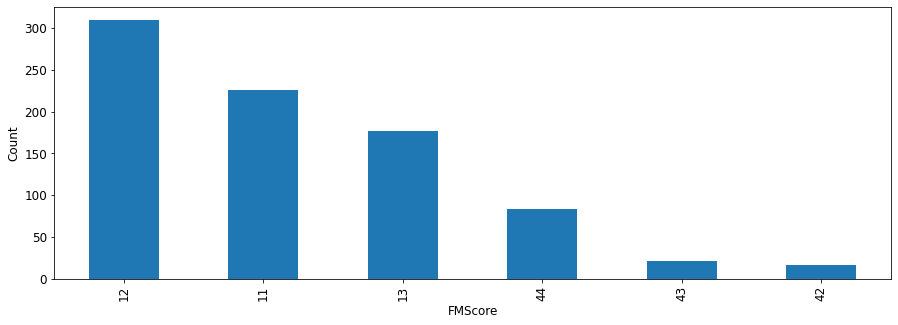

In [74]:
#Segmentation visualization

ax = rfm_segmentation1['FMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("FMScore", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm2')
plt.show()

Based on **third FM model** that we just did, we can see that the **F and M** score now consist of **all Value**. <br>
As we can see, there is an **improvement** from our model.
Let's try to do another **Feature Engineering** to our data to get **even better result**

## Feature Engineering 2

In [75]:
X_train['Frequency'].value_counts()

2     713
3      80
4      13
5      12
9       4
13      2
10      2
8       2
7       2
29      1
28      1
6       1
Name: Frequency, dtype: int64

In [76]:
X_train.shape

(833, 13)

In [77]:
712/837*100

85.06571087216248

The **Frequency data** distribution is **heavily distributed** between **2 Score** value. <br>
Around **85% of our data** is distributed there, therefore we will try to do the **RFM Model** again without that data.

## RFM Machine Learning 3

In [78]:
X_train = X_train[X_train['Frequency'] > 2]

In [79]:
quantiles = X_train.quantile(q=[0.25,0.5,0.75])

In [80]:
#Making new columns for F and M Quartile

rfm_segmentation2 = X_train
X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))

<ipython-input-80-32ea742df21f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
<ipython-input-80-32ea742df21f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))


As we can see, the **reason** we are **not using the recency**, is because we have **limit the data** to year 2019. <br> And we are heavily **focused** on the **frequency and score**.

In [81]:
#Giving F and M value to our data

rfm_segmentation2['FMScore'] = rfm_segmentation2.F_Quartile.map(str) \
                            + rfm_segmentation2.M_Quartile.map(str)
rfm_segmentation2.head()

<ipython-input-81-f476e9f850cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_segmentation2['FMScore'] = rfm_segmentation2.F_Quartile.map(str) \


Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
17259    29565  2019              16    Philippines          CA          3   
18635    31984  2019              43      Indonesia          ID          5   
17549    30069  2019              43      Indonesia          ID         10   
13303    22819  2019              43    New Zealand          ID          3   
15587    26660  2019              43      Indonesia          ID          8   

       Promo_id  Recency  Country_booked_id  Score  F_Quartile  M_Quartile  \
17259         3      331                  3      6           1           1   
18635         5      175                  5     10           4           3   
17549        10     1200                 10     20           4           4   
13303         6      360                  6     12           1           3   
15587         8      872                  8     16           4           4   

      FMScore  
17259      11  
18635      43  
17549      44  
13303      13  
15587      44

In [82]:
#Looking at value counts of the FM Score of our data

rfm_segmentation2['FMScore'].value_counts()

11    31
12    28
13    21
44    18
43     9
31     6
33     6
32     1
Name: FMScore, dtype: int64

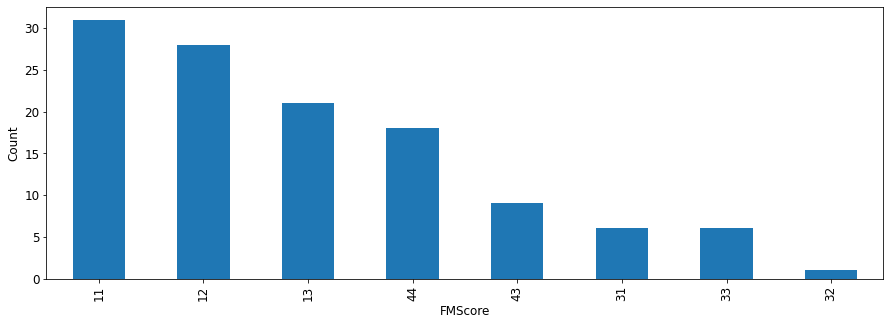

In [83]:
#Segmentation visualization

ax = rfm_segmentation2['FMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("FMScore", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm3')
plt.show()

Based on **third FM algorithm** that we just did, we can see that the **F and M** score now consist of **all values**. <br>
As we can see, there is an **improvement** from our model.<br>
For **myself**, I really like this result since it show **better segmentation** of our customer.

### Using third iteration model to our data

In [84]:
#Making new columns for F and M Quartile

rfm_segmentation3 = X_train_copy
X_train_copy['F_Quartile'] = X_train_copy['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
X_train_copy['M_Quartile'] = X_train_copy['Score'].apply(FMScore, args=('Score',quantiles,))

As we can see, the **reason** we are **not using the recency**, is because we have **limit the data** to year 2019. <br> And we are heavily **focused** on the **frequency and score**.

In [85]:
#Giving F and M value to our data

rfm_segmentation3['FMScore'] = rfm_segmentation3.F_Quartile.map(str) \
                            + rfm_segmentation3.M_Quartile.map(str)
rfm_segmentation3.head()

Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
12082    20759  2019              16         Canada          CA          1   
5091      8756  2019              43      Indonesia          ID          1   
2930      4928  2019              81         France          PH          1   
11301    19423  2019              43         France          ID          1   
18674    32050  2019              56    South Korea          KR          1   

       Promo_id  Recency  Country_booked_id  Score  F_Quartile  M_Quartile  \
12082         1      243                  2      3           1           1   
5091          2      151                  1      3           1           1   
2930          1      304                  2      3           1           1   
11301         1      273                  2      3           1           1   
18674         1       29                  2      3           1           1   

      FMScore  
12082      11  
5091       11  
2930       11  
11301      11  
18674      11

In [86]:
#Checking the result

rfm_segmentation3

Cust_id  Year  Nationality_id Country_booked Nationality  Frequency  \
12082    20759  2019              16         Canada          CA          1   
5091      8756  2019              43      Indonesia          ID          1   
2930      4928  2019              81         France          PH          1   
11301    19423  2019              43         France          ID          1   
18674    32050  2019              56    South Korea          KR          1   
...        ...   ...             ...            ...         ...        ...   
4845      8316  2019              43      Indonesia          ID          1   
3988      6806  2019              43      Indonesia          ID          1   
17222    29501  2019              93          Japan          SG          1   
2878      4840  2019              81      Indonesia          PH          2   
9230     15863  2019              43      Indonesia          ID          1   

       Promo_id  Recency  Country_booked_id  Score  F_Quartile  M_Quartile  \
12082         1      243                  2      3           1           1   
5091          2      151                  1      3           1           1   
2930          1      304                  2      3           1           1   
11301         1      273                  2      3           1           1   
18674         1       29                  2      3           1           1   
...         ...      ...                ...    ...         ...         ...   
4845          2       29                  1      3           1           1   
3988          2       29                  1      3           1           1   
17222         1       90                  2      3           1           1   
2878          3      364                  2      5           1           1   
9230          1      304                  1      2           1           1   

      FMScore  
12082      11  
5091       11  
2930       11  
11301      11  
18674      11  
...       ...  
4845       11  
3988       11  
17222      11  
2878       11  
9230       11  

[15173 rows x 13 columns]

In [87]:
#Looking at value counts of the FM Score of our data

rfm_segmentation3['FMScore'].value_counts()

11    15084
12       28
13       21
44       18
43        9
33        6
31        6
32        1
Name: FMScore, dtype: int64

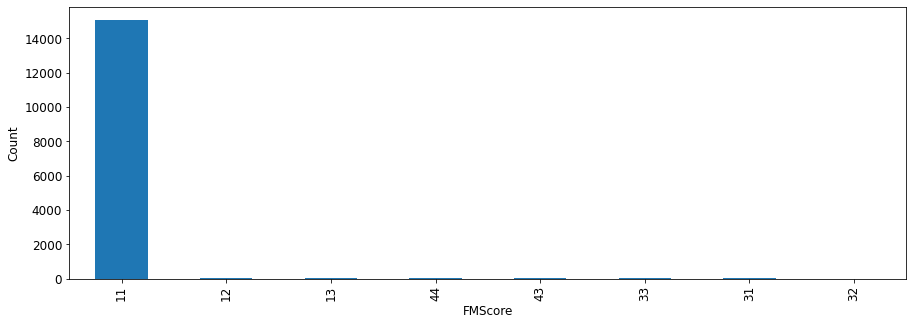

In [88]:
#Segmentation visualization

ax = rfm_segmentation3['FMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("FMScore", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm4')
plt.show()

Even though we already did a **third iteration** to our model, the result is still **not statisfactory**.<br>
Could it be because we **didn't include recency** data? <br>
Let's find out!

## Trying RFM model with Recency

We will now try to look the RFM model with Recency

In [89]:
#Selecting Lastest Recency Data

recency_df = df_1_new.groupby(by='Cust_id', as_index=False)['Recency'].max()
recency_df.columns = ['Cust_id','Recency']

#Selecting Frequency Data

frequency_df = df_comb_new.copy()
frequency_df = frequency_df[['Cust_id','Frequency']]

#Selecting Monetary Data

monetary_df = df_comb_new.copy()
monetary_df = monetary_df[['Cust_id','Score']]

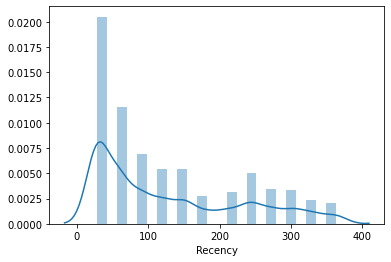

In [90]:
#Checking skewness of the data

sns.distplot(recency_df['Recency'])

In [91]:
#Merging recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='Cust_id')

#Merging with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='Cust_id')

#Checking the head
rfm_df.head()

Cust_id  Recency  Frequency  Score
0        1       59          1      4
1        2      363          1      3
2        5       90          1      3
3        7       29          1      3
4        9       29          2      4

In [92]:
#Checking for duplicates
duplicated = rfm_df[rfm_df.duplicated(keep=False)]

print("There is {} duplicated values in data frame".format(rfm_df.duplicated().sum()))

There is 4275 duplicated values in data frame


In [93]:
#Dropping the duplicates

rfm_df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(rfm_df.duplicated().sum()))

There is 0 duplicated values in data frame


In [94]:
target = rfm_df[['Score','Frequency','Recency']]

# Data splitting for Train, Validation and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rfm_df, target, test_size=0.2, random_state=42)

#_____ Checking shape ____
print(X_train.shape)
print(X_test.shape)

(14940, 4)
(3736, 4)


In [95]:
#Making copy of the Trainset
X_train_copy = X_train.copy()

In [96]:
#Adding quantiles based on Q1,Q2,Q3

quantiles = X_train.quantile(q=[0.25,0.5,0.75])
quantiles

Cust_id  Recency  Frequency  Score
0.25   8211.75     29.0        1.0    3.0
0.50  16378.50     90.0        1.0    3.0
0.75  24480.75    243.0        1.0    4.0

In [97]:
#Making new columns for R, F and M Quartile

rfm_segmentation = X_train
X_train['R_Quartile'] = X_train['Recency'].apply(RScore, args=('Recency',quantiles,))
X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
X_train['M_Quartile'] = X_train['Score'].apply(FMScore, args=('Score',quantiles,))

<ipython-input-97-aaebcc48fea2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['R_Quartile'] = X_train['Recency'].apply(RScore, args=('Recency',quantiles,))
<ipython-input-97-aaebcc48fea2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['F_Quartile'] = X_train['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
<ipython-input-97-aaebcc48fea2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [98]:
#Creating RFM segmentation table

rfm_segmentation = X_train
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Score'].apply(FMScore, args=('Score',quantiles,))

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)

<ipython-input-98-756710a3d1ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
<ipython-input-98-756710a3d1ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
<ipython-input-98-756710a3d1ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [99]:
#Looking at value counts of the RFM Score of our data

rfm_segmentation['RFMScore'].value_counts()

211    3397
411    3177
311    2781
111    1556
213     789
113     708
313     694
413     643
244     215
144     181
344     179
444     121
243      79
141      78
114      78
343      58
241      49
214      46
143      44
443      27
314      18
341      13
414       5
441       4
Name: RFMScore, dtype: int64

In [100]:
rfm_segmentationdtree = rfm_segmentation.copy()

As we can see from the RFM model we just did we can see with that the **distribution is not as bad** as the **first RM model** we did. <Br>
The reason behind this is because the **recency** data is **not as skewed** as frequency or score data. <br>
For the **analysis and conclusion** we will use the result from **this model**.

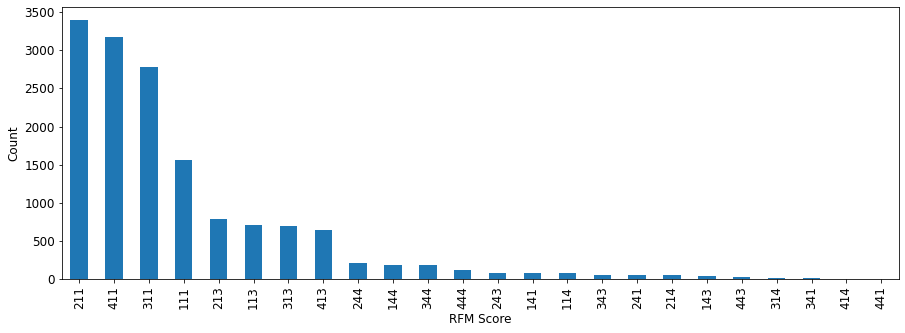

In [101]:
#Segmentation visualization

ax = X_train['RFMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm5')
plt.show()

We can see that our **largest segment** is made up of our **least valuable customers**. <br> 
However, our **next two largest segment** is made up of our **most valuable customers**.<br> 
This **seems strange**. Let’s look at which values our data was partitioned on.

In [102]:
#Checking range between partitions

r_quarters = rfm_segmentation['Recency'].quantile(q=[0.25,0.5,0.75, 1]).to_list()
f_quarters = rfm_segmentation['Frequency'].quantile(q=[0.25,0.5,0.75, 1]).to_list()
m_quarters = rfm_segmentation['Score'].quantile(q=[0.25,0.5,0.75, 1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), 
                      columns=['Q_Recency','Q_Frequency', 'Q_Monetary'],
                     index = ['first_part','second_part','third_part', 'max'])
quartile_spread

Q_Recency  Q_Frequency  Q_Monetary
first_part        29.0          1.0         3.0
second_part       90.0          1.0         3.0
third_part       243.0          1.0         4.0
max              363.0         30.0        60.0

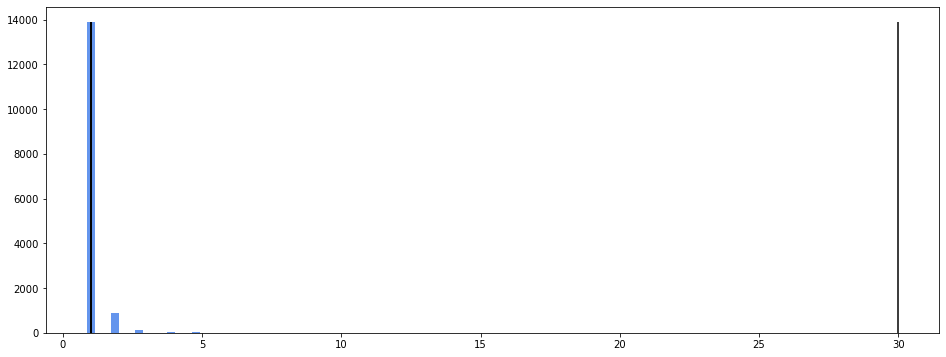

In [103]:
# Vizualization of Q Spread

plt.figure(figsize = (16,6))
hist = plt.hist(rfm_segmentation['Frequency'], bins=100, align='left', color='cornflowerblue')
for q in f_quarters:
    plt.vlines(q, ymin=0, ymax = max(hist[0]))

As seen above from the **vizualization and Q Spread**, as we know from our **first three iteration**, the Frequency data is **not distributed normaly**.
We will **simplify** the process by getting the **known Quantiles** and **applying it straight to the RFM data**.

In [104]:
#Adding quantiles based on Q1,Q2,Q3

quantiles1 = X_train_copy.quantile(q=[0.25,0.5,0.75])

In [105]:
#Making new columns for R, F and M Quartile with the new quantile threshold

rfm_segmentation_copy = X_train_copy
X_train_copy['R_Quartile'] = X_train_copy['Recency'].apply(RScore, args=('Recency',quantiles1,))
X_train_copy['F_Quartile'] = X_train_copy['Frequency'].apply(FMScore, args=('Frequency',quantiles1,))
X_train_copy['M_Quartile'] = X_train_copy['Score'].apply(FMScore, args=('Score',quantiles1,))

#Creating RFM segmentation table

rfm_segmentation_copy['RFMScore'] = rfm_segmentation_copy.R_Quartile.map(str) \
                            + rfm_segmentation_copy.F_Quartile.map(str) \
                            + rfm_segmentation_copy.M_Quartile.map(str)

In [106]:
#Looking at value counts of the RFM Score of our data

rfm_segmentation_copy['RFMScore'].value_counts()

211    3397
411    3177
311    2781
111    1556
213     789
113     708
313     694
413     643
244     215
144     181
344     179
444     121
243      79
141      78
114      78
343      58
241      49
214      46
143      44
443      27
314      18
341      13
414       5
441       4
Name: RFMScore, dtype: int64

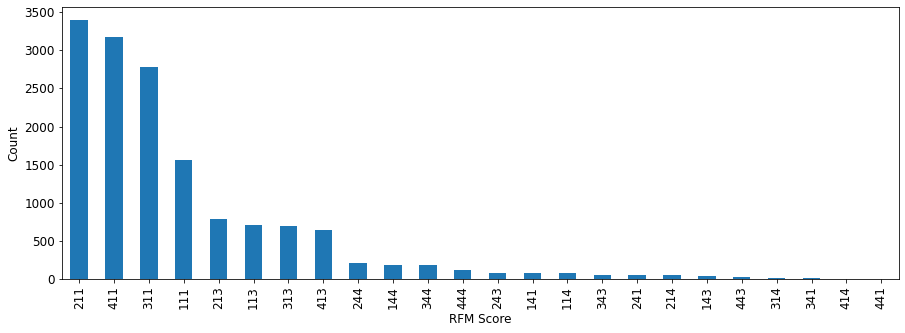

In [107]:
#Segmentation visualization

ax = rfm_segmentation_copy['RFMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm6')
plt.show()

As seen above from the **vizualization**, there are **changes** on the RFM score, we have more **diverse** RFM score.<br>
The **most changes** can be seen from the **111,211,311,411** group, it'll give a **better understanding** on how to proceed.

### Now lets try our model at the test data

In [108]:
#Making new columns for R, F and M Quartile with the new quantile threshold

rfm_segmentation_test = X_test
X_test['R_Quartile'] = X_test['Recency'].apply(RScore, args=('Recency',quantiles1,))
X_test['F_Quartile'] = X_test['Frequency'].apply(FMScore, args=('Frequency',quantiles1,))
X_test['M_Quartile'] = X_test['Score'].apply(FMScore, args=('Score',quantiles1,))

#Creating RFM segmentation table

rfm_segmentation_test['RFMScore'] = rfm_segmentation_test.R_Quartile.map(str) \
                            + rfm_segmentation_test.F_Quartile.map(str) \
                            + rfm_segmentation_test.M_Quartile.map(str)

<ipython-input-108-d09c798a2c21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['R_Quartile'] = X_test['Recency'].apply(RScore, args=('Recency',quantiles1,))
<ipython-input-108-d09c798a2c21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['F_Quartile'] = X_test['Frequency'].apply(FMScore, args=('Frequency',quantiles1,))
<ipython-input-108-d09c798a2c21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [109]:
#Looking at value counts of the RFM Score of our data

rfm_segmentation_test['RFMScore'].value_counts()

211    836
411    825
311    674
111    407
213    210
413    171
113    167
313    163
244     53
344     41
144     41
444     26
114     19
141     16
214     16
343     14
243     14
241     10
143      9
314      9
341      7
443      4
441      2
414      2
Name: RFMScore, dtype: int64

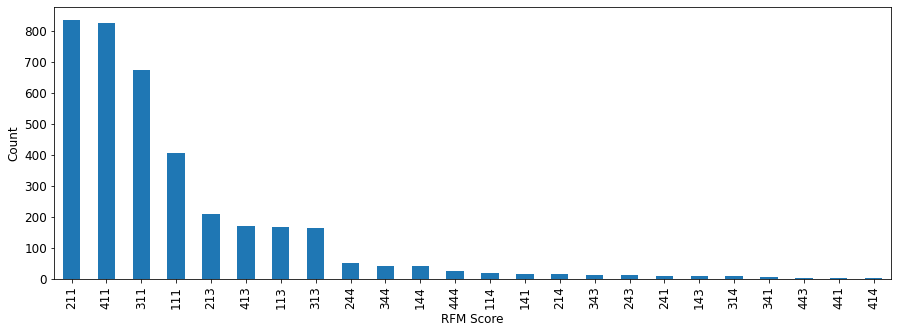

In [110]:
#Segmentation visualization

ax = rfm_segmentation_test['RFMScore'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.savefig('rfm7')
plt.show()

## Comparing train and test result 

In [111]:
#Adding percentage to each RFM Score

c = rfm_segmentation_test.RFMScore.value_counts(dropna=False)
p = rfm_segmentation_test.RFMScore.value_counts(dropna=False, normalize=True)
c = pd.concat([c,p], axis=1, keys=['counts', '%'])
c = c.rename(columns={'%':'Percentage'})

c2 = rfm_segmentation.RFMScore.value_counts(dropna=False)
p = rfm_segmentation.RFMScore.value_counts(dropna=False, normalize=True)
c2 = pd.concat([c2,p], axis=1, keys=['counts', '%'])
c2 = c2.rename(columns={'counts': 'counts2','%':'Percentage2'})

In [112]:
joined = c.join(c2)
# joined.to_excel("output.xlsx") 

In [113]:
joined

counts  Percentage  counts2  Percentage2
211     836    0.223769     3397     0.227376
411     825    0.220824     3177     0.212651
311     674    0.180407     2781     0.186145
111     407    0.108940     1556     0.104150
213     210    0.056210      789     0.052811
413     171    0.045771      643     0.043039
113     167    0.044700      708     0.047390
313     163    0.043630      694     0.046452
244      53    0.014186      215     0.014391
344      41    0.010974      179     0.011981
144      41    0.010974      181     0.012115
444      26    0.006959      121     0.008099
114      19    0.005086       78     0.005221
141      16    0.004283       78     0.005221
214      16    0.004283       46     0.003079
343      14    0.003747       58     0.003882
243      14    0.003747       79     0.005288
241      10    0.002677       49     0.003280
143       9    0.002409       44     0.002945
314       9    0.002409       18     0.001205
341       7    0.001874       13     0.000870
443       4    0.001071       27     0.001807
441       2    0.000535        4     0.000268
414       2    0.000535        5     0.000335

In [114]:
joined['difference'] = (joined.Percentage - joined.Percentage2)*100

As we can see, the **biggest diffrence** from our model and train data lies on the **low value customer**.<br>
It wont cause too much problem because the difference lies on the **Recency** data, which we will be able to perfect it by simply giving **manual threshold** for it.

## RFM Model Conclusion

In [115]:
#Selecting the known Treshold

rfm_dff = rfm_df.copy()
rfm_dff = rfm_dff[rfm_dff['Frequency'] > 2]
quantiles1 = rfm_dff.quantile(q=[0.25,0.5,0.75])

#Making new columns for R, F and M Quartile with the whole dataset

rfm_segmentation_final = rfm_df
rfm_df['R_Quartile'] = rfm_df['Recency'].apply(RScore, args=('Recency',quantiles1,))
rfm_df['F_Quartile'] = rfm_df['Frequency'].apply(FMScore, args=('Frequency',quantiles1,))
rfm_df['M_Quartile'] = rfm_df['Score'].apply(FMScore, args=('Score',quantiles1,))

#Creating RFM segmentation table

rfm_segmentation_final['RFMScore'] = rfm_segmentation_final.R_Quartile.map(str) \
                            + rfm_segmentation_final.F_Quartile.map(str) \
                            + rfm_segmentation_final.M_Quartile.map(str)

rfm_segmentation_final['RFM_Score'] = rfm_segmentation_final['R_Quartile'] + rfm_segmentation_final['F_Quartile'] + rfm_segmentation_final['M_Quartile']

In [116]:
rfm_segmentation_final['RFM_Score'] = rfm_segmentation_final['R_Quartile'] + rfm_segmentation_final['F_Quartile'] + rfm_segmentation_final['M_Quartile']

In [117]:
# Define rfm_level function

def rfm_level(rfm_segmentation_final):
    if rfm_segmentation_final['RFM_Score'] >= 9:
        return "Opulence"
    elif ((rfm_segmentation_final['RFM_Score'] >= 8) and (rfm_segmentation_final['RFM_Score'] < 9)):
        return 'Champions'
    elif ((rfm_segmentation_final['RFM_Score'] >= 7) and (rfm_segmentation_final['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((rfm_segmentation_final['RFM_Score'] >= 6) and (rfm_segmentation_final['RFM_Score'] < 7)):
        return 'Potential'
    elif ((rfm_segmentation_final['RFM_Score'] >= 5) and (rfm_segmentation_final['RFM_Score'] < 6)):
        return 'Promising'
    elif ((rfm_segmentation_final['RFM_Score'] >= 4) and (rfm_segmentation_final['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    
# Create a new variable RFM_Level
rfm_segmentation_final['RFM_Level'] = rfm_segmentation_final.apply(rfm_level, axis=1)

In [118]:
# Showing how many costumer belong which segment

print("Opulence: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Opulence']))
print("Champions: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Champions']))
print("Loyalist: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Loyal']))
print("Potentials: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Potential']))
print("Promising: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Promising']))
print("Needs Attention: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Needs Attention']))
print("Require Activation: ",len(rfm_segmentation_final[rfm_segmentation_final['RFM_Level']=='Require Activation']))

Opulence:  58
Champions:  22
Loyalist:  152
Potentials:  9614
Promising:  5653
Needs Attention:  1937
Require Activation:  1240


In [119]:
rfm_segmentation_final.shape

(18676, 10)

In [120]:
(58+22+152)/18676

0.012422360248447204

In [121]:
# Define rfm_level function

def rfm_labels(df):
    if df['RFM_Level'] == "Opulence":
        return 1
    elif df['RFM_Level'] == "Champions":
        return 2
    elif df['RFM_Level'] == "Loyal":
        return 3
    elif df['RFM_Level'] == "Potential":
        return 4
    elif df['RFM_Level'] == "Promising":
        return 5
    elif df['RFM_Level'] == "Needs Attention":
        return 6
    else:
        return 7

In [122]:
rfm_segmentation_final['RFM_Labels'] = rfm_segmentation_final.apply(rfm_labels, axis=1)

<Figure size 432x288 with 0 Axes>

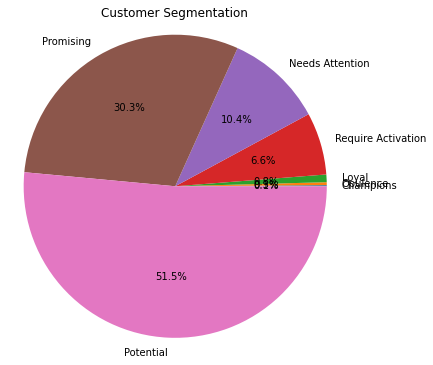

In [123]:
#Customer segmentation visualizatio

datapie = rfm_segmentation_final[['RFM_Level','RFMScore']].copy()
datapie['Count'] = 1
datapie.drop(['RFMScore'], axis=1, inplace=True)
datapie = datapie.groupby(['RFM_Level']).sum()
datapie = datapie.reset_index()

datapie10 = datapie.sort_values('Count').head(10).copy()

fig = plt.figure()

plt.figure(figsize=(6,6))
my_data = datapie10['Count']
my_labels = datapie10['RFM_Level']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.axis('equal')
plt.savefig('custH.png')
plt.show()

**Insights for company:**
<br>
1. **Opulence** : Bought recently, buy often and spend the most. Reward them. Can be early adopters for new products. Will promote your brand.
1. **Champions** : Spend good money with us often. Responsive to promotions. Upsell higher value products. Ask for reviews. Engage them.
1. **Loyalist** : Recent customers, but spent a good amount and bought more than once. Offer membership / loyalty program, recommend other products.
1. **Potentials** : It’s called promising, cause we hope they would be our loyal or potential customers. So, we can reach them with another recommended product that has been purchase before and give information about benefit with membership program.
1. **Promising** : Recent customers, but haven’t spent much. Create brand awareness, offer free trials
1. **Needs Attention** : Average recency, frequency and monetary values. Will lose them if not reactivated. Share valuable resources, recommend popular products / renewals at discount, reconnect with them.
1. **Require Activation** : Lowest recency, frequency and monetary scores. Revive interest with reach out activation.
<br><br>
As seen from above, **most customer** belongs to **Require Activation and Needs Attention**, it might be **beneficial** for company in a **long run** to invest more on those 2 groups.
<br><br>
We have **huge market** in **Indonesia, Philipines, Singapore and USA**, it might be beneficial for company to **target the digital marketing** on those countries.
<br><br>
Our costumer demographic are mostly **young adults female**, company can plan a better **campaign** with this info in mind.
<br><br>
Indonesia, Japan, and USA are very popular photo destination for our customer. Company can do **special promotions** and maybe **hire more photographer** for those countries (to supply high season demand)

### Next Step Data Science Wise

1. Get actual data on revenue per customer / order (With or without promotions).
1. Get data on what kind of promotion that company did, specific country/nationality/discount/extra photos etc.
1. Redo the data preprocessing, tweak the model, get a better RFMscore.
1. Cluster the RFMScore, proceed to make a promo reccomendation and predict the revenue / possibilty of customer buying.

## RFM Visualization

In [124]:
rfm_segmentation_final['RFM_Level'].unique()

array(['Potential', 'Require Activation', 'Opulence', 'Promising',
       'Loyal', 'Needs Attention', 'Champions'], dtype=object)

In [125]:
rfm = rfm_segmentation_final

In [126]:
#Preparing data for plotting

level_7 = rfm[rfm['RFM_Labels'] == 7]
level_6 = rfm[rfm['RFM_Labels'] == 6]
level_5 = rfm[rfm['RFM_Labels'] == 5]
level_4 = rfm[rfm['RFM_Labels'] == 4]
level_3 = rfm[rfm['RFM_Labels'] == 3]
level_2 = rfm[rfm['RFM_Labels'] == 2]
level_1 = rfm[rfm['RFM_Labels'] == 1]

data = [level_1,level_2,level_3,level_4,level_4, level_5, level_6,level_7]
colors = ("purple", "green", "blue",'yellow','cyan','darkgrey','red')
groups = ["Opulence", "Champions",'Loyalist','Potentials', 'Promising',
          'Needs Attention','Require Activation']

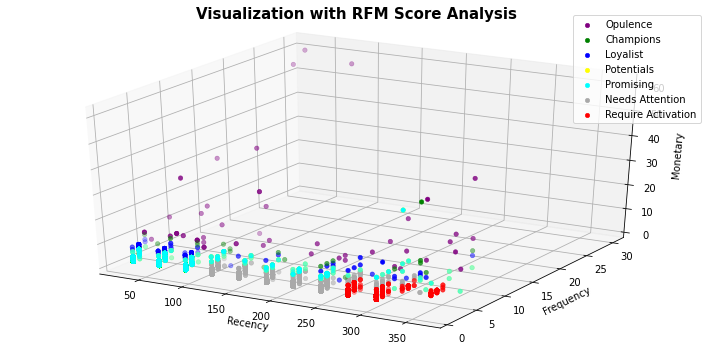

In [127]:
#Plotting RFM Score

level_7 = rfm[rfm['RFM_Labels'] == 7]
level_6 = rfm[rfm['RFM_Labels'] == 6]
level_5 = rfm[rfm['RFM_Labels'] == 5]
level_4 = rfm[rfm['RFM_Labels'] == 4]
level_3 = rfm[rfm['RFM_Labels'] == 3]
level_2 = rfm[rfm['RFM_Labels'] == 2]
level_1 = rfm[rfm['RFM_Labels'] == 1]

from mpl_toolkits import mplot3d
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
for item,c,g in zip(data,colors,groups):
    ax.scatter(item['Recency'], item['Frequency'], item['Score'], c=c,label=g,
           linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle('Visualization with RFM Score Analysis',fontsize=15,fontweight='semibold')
plt.legend()
plt.tight_layout()

In [128]:
rfm_level_agg = rfm.groupby('RFM_Labels').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Score': ['mean', 'count']
}).round(1)

In [129]:
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

RFM_Labels Recency Frequency Score      
                mean      mean  mean count
0          1   148.0       7.1  17.7    58
1          2   190.8       3.8  11.6    22
2          3    85.2       2.2   8.0   152
3          4    51.1       1.1   3.1  9614
4          5   179.8       1.1   3.1  5653
5          6   290.1       1.1   3.4  1937
6          7   346.4       1.1   3.3  1240

In [130]:
import squarify

In [131]:
# Customer Segmentation Vizualization

import plotly.graph_objects as go

fig =go.Figure(go.Treemap(
    labels = rfm_level_ag['RFM_Labels'],
    parents = ['Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation'], 
    values= rfm_level_ag[('Score', 'count')]
))

fig.show()

No handles with labels found to put in legend.


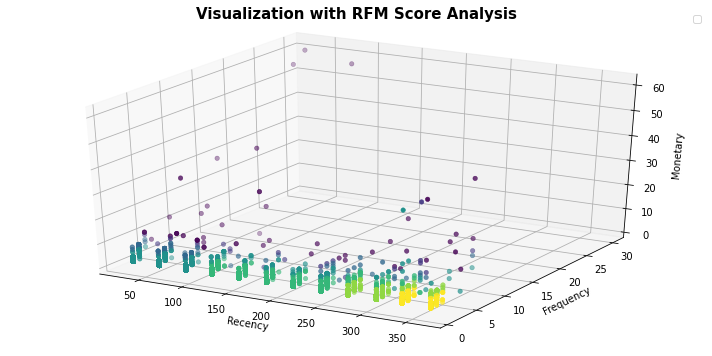

In [132]:
# Plotting RFM Score

from mpl_toolkits import mplot3d
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Score'], c=rfm['RFM_Labels'], cmap='viridis',
           linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle('Visualization with RFM Score Analysis',fontsize=15,fontweight='semibold')
plt.legend()
plt.tight_layout()

In [133]:
rfm.groupby(['RFM_Level']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Score' : 'mean',
    'RFM_Labels' : 'count'
})

Recency  Frequency      Score  RFM_Labels
RFM_Level                                                       
Champions           190.772727   3.818182  11.636364          22
Loyal                85.217105   2.171053   7.986842         152
Needs Attention     290.141456   1.106350   3.361900        1937
Opulence            148.034483   7.137931  17.672414          58
Potential            51.053256   1.053464   3.120657        9614
Promising           179.818857   1.069521   3.110915        5653
Require Activation  346.350000   1.090323   3.338710        1240

## KMeans

K-means clustering is a method of **vector quantization**, originally from signal processing, that aims to **partition and observations** into **k clusters** in which each **observation belongs to the cluster** with the **nearest mean**, serving as a **prototype of the cluster**.

In [134]:
# Scaling with Scaler

rfm_model = rfm[['Recency','Frequency','Score']]

In [135]:
# Data splitting for Train, Validation and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rfm_model, target, test_size=0.2, random_state=42)

#_____ Checking shape ____
print(X_train.shape)
print(X_test.shape)

(14940, 3)
(3736, 3)


In [136]:
# Scaling data Scaler

X_train = X_train[['Recency','Frequency','Score']]

In [137]:
standar = StandardScaler()
standar.fit(X_train)

StandardScaler()

In [138]:
X_train = standar.transform(X_train)
X_train = pd.DataFrame(X_train, columns=['Recency','Frequency','Score'])
X_train['Cust_id'] = X_train.index

In [139]:
rfm_segmentation_final['recency_log'] = rfm_segmentation_final['Recency'].apply(math.log)
rfm_segmentation_final['frequency_log'] = rfm_segmentation_final['Frequency'].apply(math.log)
rfm_segmentation_final['amount_log'] = rfm_segmentation_final['Score'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = rfm_segmentation_final[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

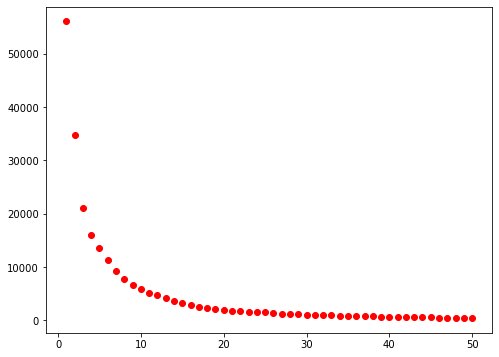

The best K sugest:  14


In [140]:
#Elbow method using KMeans 

cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters. 
    model = KMeans(
        n_clusters=k, 
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

As we can see from the **elbow method** above, **KMeans suggest** the best clusters for our segmentation is **14**. <br>
**Data Science wise**, we should use **14 cluster** for the next step, **but** if we think about it, having **14 cluster** for our customer can be **too many** as most company segmennt their customer into **4-6 clusters**.<br>
Moving forward we will look in between those number of cluster.

In [141]:
# # Modeling with KMeans

# inertia_list = []

# for i in range(1,100):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(X_train[['Recency','Frequency','Score']])
#     inertia_list.append(kmeans.inertia_)


# plt.figure(figsize=(15,10))
# plt.plot(range(1,100),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
# plt.title('K value vs Inertia')
# plt.xlabel('K value')
# plt.ylabel('Inertia')

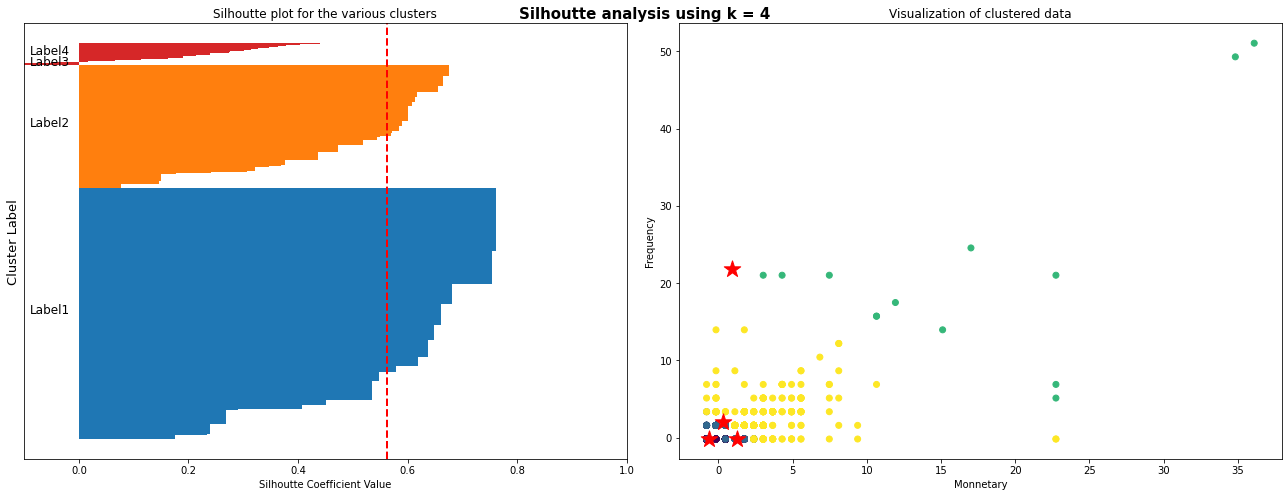

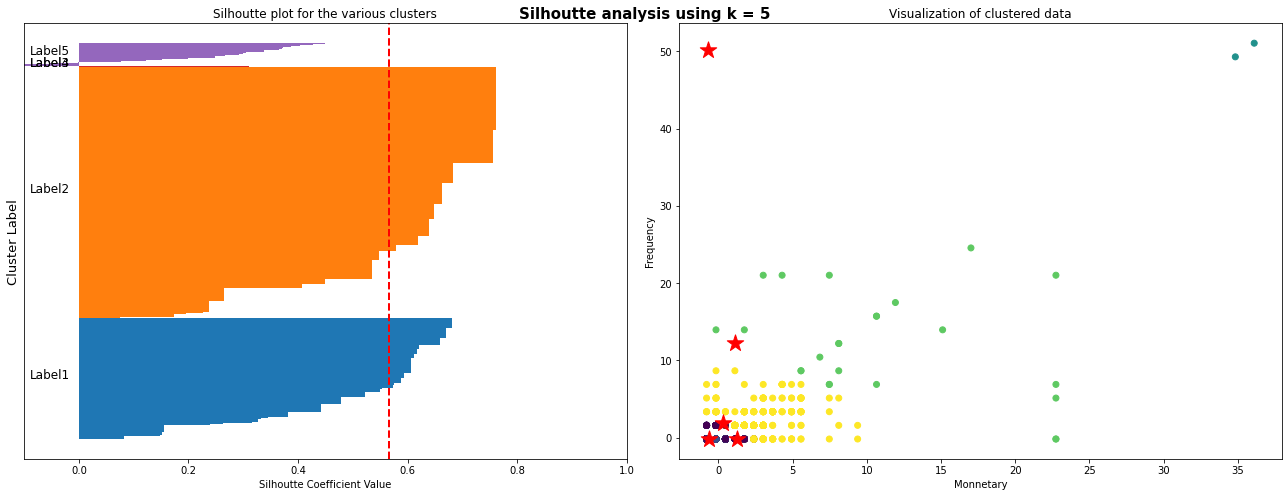

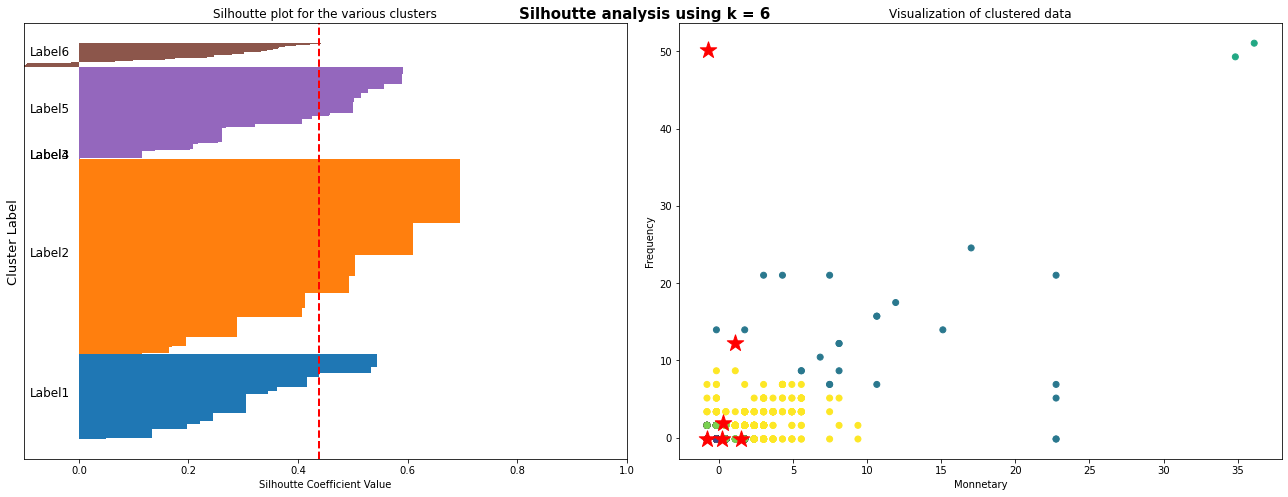

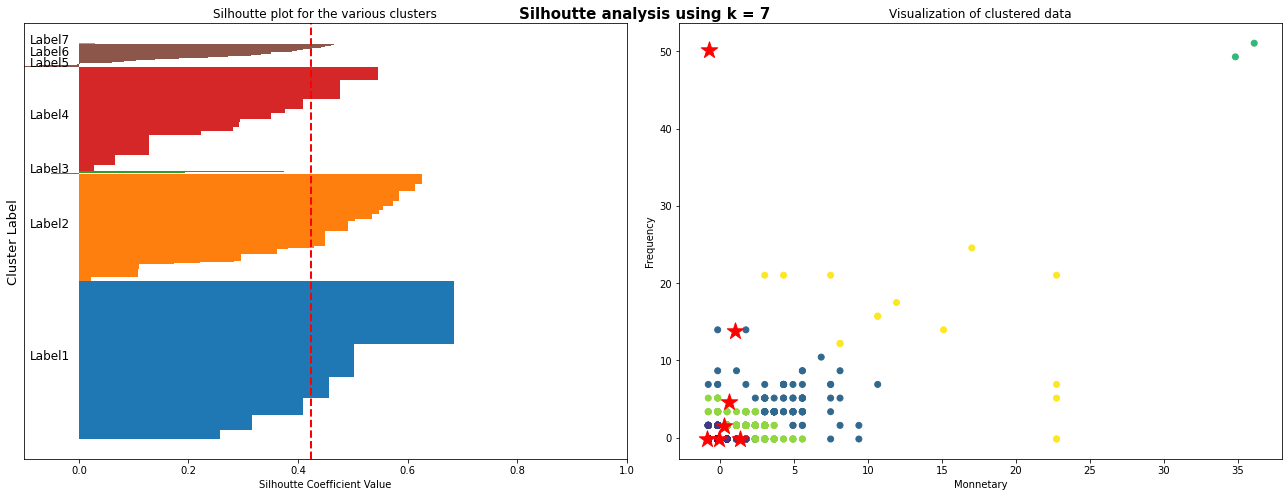

In [142]:
# Plotting possible clusters (from 4-7Cluster)

for i,k in enumerate(list(range(4,8))):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_train[['Recency','Frequency','Score']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(X_train[['Recency','Frequency','Score']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        
    ## Get average silhoutte score and using plot above 
    avg_score = np.mean(silhoutte_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth = 2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1,1])
    ax1.set_xlabel('Silhoutte Coefficient Value')
    ax1.set_ylabel('Cluster Label', fontsize=13)
    ax1.set_title('Silhoutte plot for the various clusters')
    
    ## Scatter plot of data colored with labels(cluster)
    ax2.scatter(X_train['Score'], X_train['Frequency'], c=labels)
    ax2.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=300)
    ax2.set_xlabel('Monnetary')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Visualization of clustered data')
    plt.suptitle('Silhoutte analysis using k = {}'.format(k),fontsize=15,fontweight='semibold')
    plt.tight_layout()
    

From silhouette anaylsis we know about best cluster with highest silhouette score (0.5655001281757226), we take **5 cluster** with highest score. So the result is segmentation customer with Kmeans is **5 cluster.** 

In [143]:
#Looking for Silhouette Score

for i,k in enumerate(list(range(4,8))):
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_train[['Recency','Frequency','Score']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(X_train[['Recency','Frequency','Score']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        avg_score = np.mean(silhoutte_vals)
        print(avg_score)
        

0.5627707572317008
0.5627707572317008
0.5627707572317008
0.5627707572317008
0.5654945933201269
0.5654945933201269
0.5654945933201269
0.5654945933201269
0.5654945933201269
0.4355611108136176
0.4355611108136176
0.4355611108136176
0.4355611108136176
0.4355611108136176
0.4355611108136176
0.44346211460589235
0.44346211460589235
0.44346211460589235
0.44346211460589235
0.44346211460589235
0.44346211460589235
0.44346211460589235


Silhouette refers to a method of **interpretation and validation** of **consistency within clusters** of data. The technique provides a succinct **graphical representation** of **how well** each object has been **classified**.

In [144]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_train[['Recency','Frequency','Score']])
centroids = km.cluster_centers_
silhoutte_vals = silhouette_samples(X_train[['Recency','Frequency','Score']], labels)

In [145]:
df_Kmeans = X_train[['Recency','Frequency','Score']]

In [146]:
np.mean(silhoutte_vals)

0.5654945933201269

Our **silhouette score is 0.56** (highest out of the rest) so we'll take this **lables to segment** our customers. We will be able to see the **segmentation characteristic** using K-means.

In [147]:
df_Kmeans['Labels'] = labels

In [148]:
#Showing the clusters distribution

df_Kmeans.groupby(['Labels']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Score' : 'mean',
    'Labels' : 'count'
})

Recency  Frequency      Score  Labels
Labels                                        
0      -0.642168  -0.154386  -0.187664    9460
1       1.258366  -0.116672  -0.079882    4603
2       0.302037   1.885420   2.125309     851
3       1.127529  12.195066  10.975804      24
4      -0.722592  50.179447  35.471955       2

- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased

In [149]:
# Function to give cluster

def applyLevel(x):
    if x['Labels'] == 0 :
        return 'Need Attention'
    elif x['Labels'] == 1 :
        return 'Loyal'
    elif x['Labels'] == 2 :
        return 'Champions'
    elif x['Labels'] == 3 :
        return 'Need Activation'
    else :
        return 'Promising'

In [150]:
df_Kmeans['CustLevel'] = df_Kmeans.apply(applyLevel,axis=1)

In [151]:
#Showing the clusters distribution

df_Kmeans.groupby(['Labels']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Score' : 'mean',
    'Labels' : 'count'
})

Recency  Frequency      Score  Labels
Labels                                        
0      -0.642168  -0.154386  -0.187664    9460
1       1.258366  -0.116672  -0.079882    4603
2       0.302037   1.885420   2.125309     851
3       1.127529  12.195066  10.975804      24
4      -0.722592  50.179447  35.471955       2

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must hav

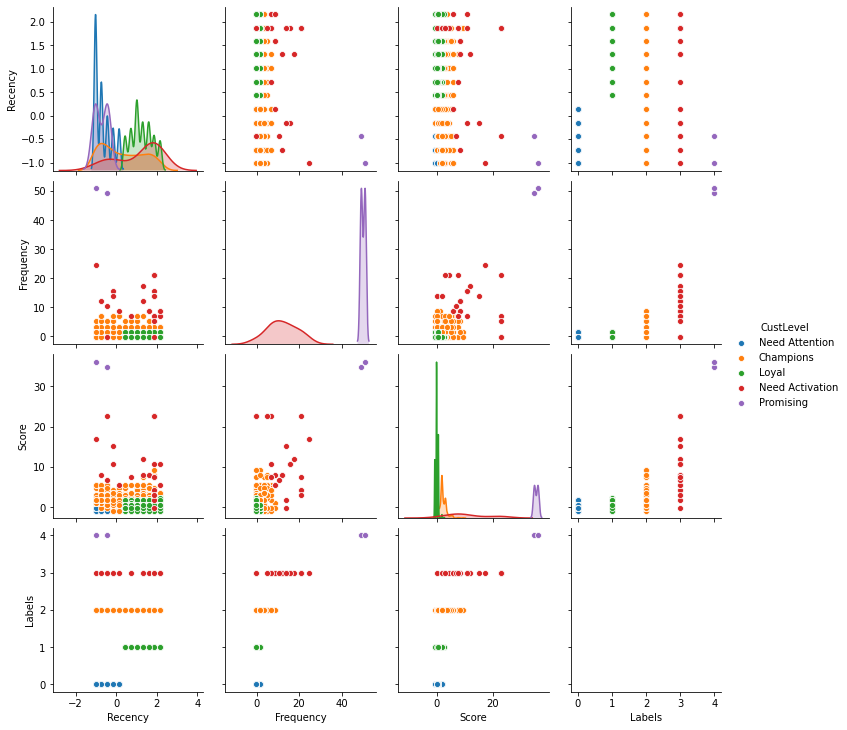

In [152]:
sns.pairplot(df_Kmeans,hue='CustLevel')

In [153]:
df_Kmeans

Recency  Frequency     Score  Labels       CustLevel
0     -0.727345  -0.171941 -0.158810       0  Need Attention
1      0.441903   1.594774  1.113717       2       Champions
2      1.601645  -0.171941 -0.158810       1           Loyal
3     -0.147474  -0.171941 -0.795074       0  Need Attention
4      0.727085  -0.171941  0.477453       1           Loyal
...         ...        ...       ...     ...             ...
14935  1.021774  -0.171941 -0.158810       1           Loyal
14936  1.601645  -0.171941  0.477453       1           Loyal
14937 -1.012527  -0.171941 -0.158810       0  Need Attention
14938 -1.012527  -0.171941 -0.158810       0  Need Attention
14939 -0.432656   1.594774  1.749981       2       Champions

[14940 rows x 5 columns]

## Testing model

In [154]:
# Scaling data with Scaler

X_test = X_train[['Recency','Frequency','Score']]

In [155]:
standar = StandardScaler()
standar.fit(X_test)

StandardScaler()

In [156]:
X_test = standar.transform(X_test)
X_test = pd.DataFrame(X_test, columns=['Recency','Frequency','Score'])
X_test['Cust_id'] = X_test.index

Text(0, 0.5, 'Inertia')

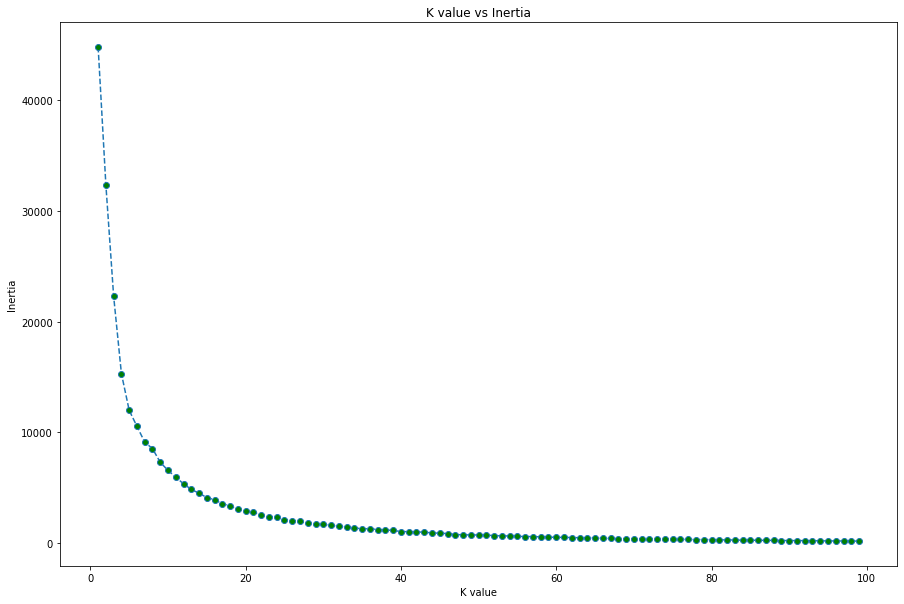

In [157]:
# Modeling with KMeans

inertia_list = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_test[['Recency','Frequency','Score']])
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize=(15,10))
plt.plot(range(1,100),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

In [158]:
from sklearn.metrics import silhouette_samples

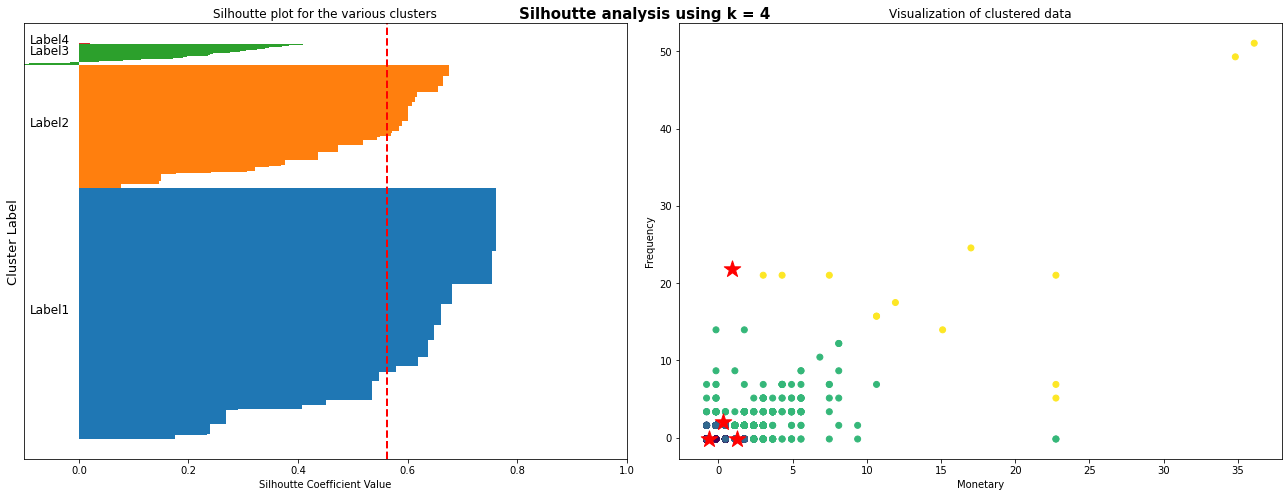

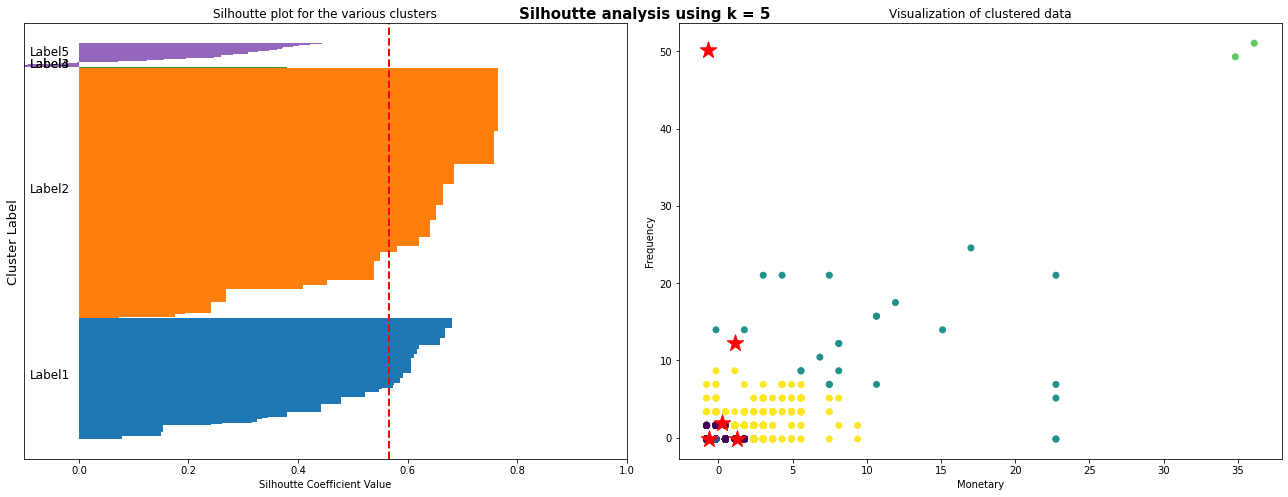

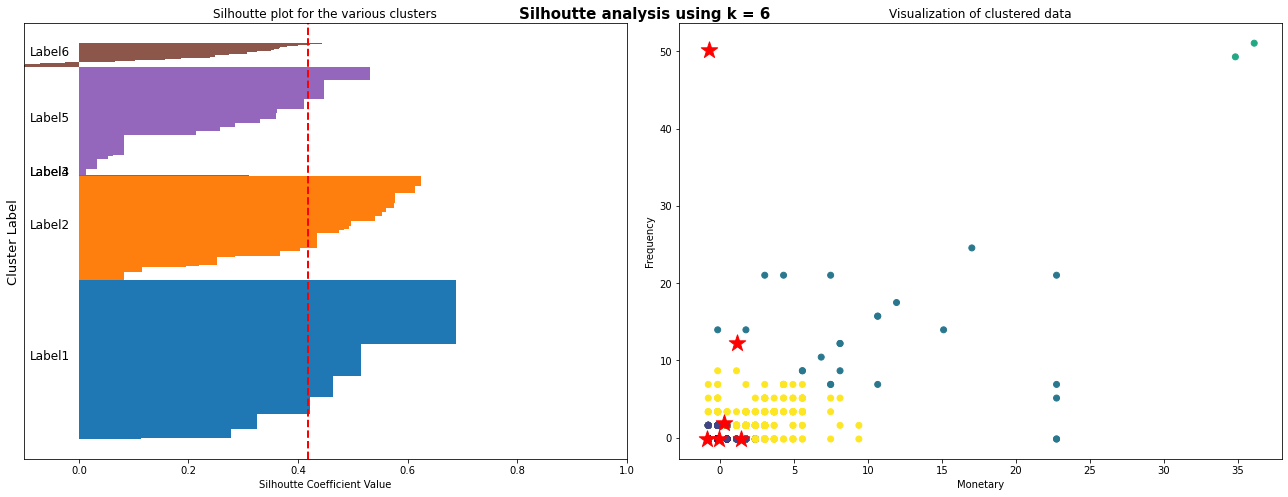

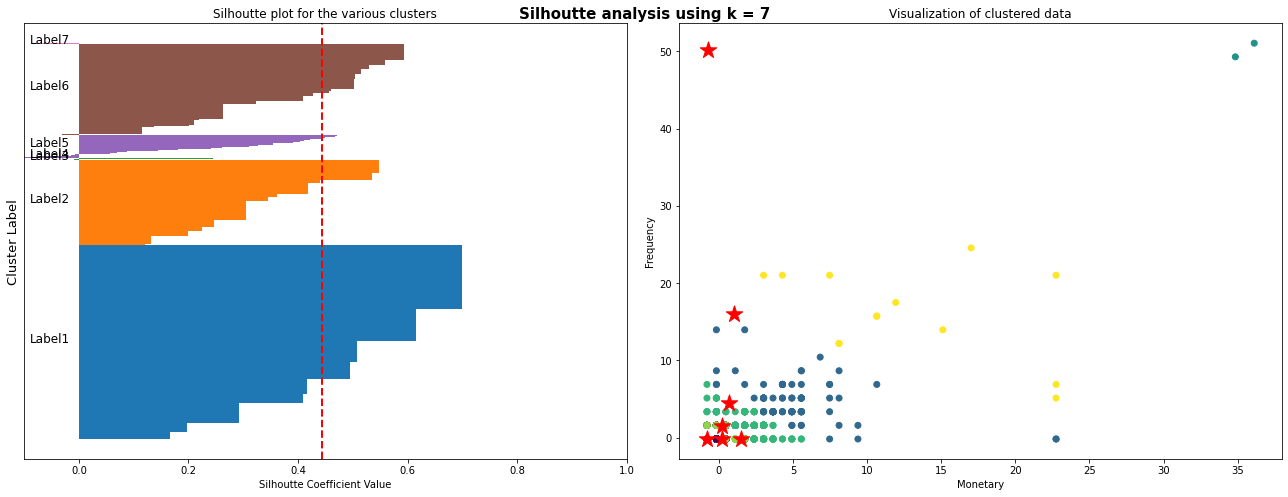

In [159]:
# Plotting possible clusters

for i,k in enumerate(list(range(4,8))):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_test[['Recency','Frequency','Score']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(X_test[['Recency','Frequency','Score']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        
    ## Get average silhoutte score and using plot above 
    avg_score = np.mean(silhoutte_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth = 2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1,1])
    ax1.set_xlabel('Silhoutte Coefficient Value')
    ax1.set_ylabel('Cluster Label', fontsize=13)
    ax1.set_title('Silhoutte plot for the various clusters')
    
    ## Scatter plot of data colored with labels(cluster)
    ax2.scatter(X_test['Score'], X_test['Frequency'], c=labels)
    ax2.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=300)
    ax2.set_xlabel('Monetary')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Visualization of clustered data')
    plt.suptitle('Silhoutte analysis using k = {}'.format(k),fontsize=15,fontweight='semibold')
    plt.tight_layout()
    

From silhouette anaylsis we know about best cluster with highest silhouette score (0.5660630206951296), we take **5 cluster** with highest score. So the result is segmentation customer with Kmeans is **5 cluster.** 
<br>**Silhouette Score Test**: 0.5660630206951296
<br>**Silhouette Score Train**: 0.5655001281757226
<br> There are only slight difference between our Train and Test Silhouette Score, therefore its safe to say that we can segment our customer into **5 cluster**.

In [160]:
# Getting Silhoutte Score

for i,k in enumerate(list(range(4,8))):
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_train[['Recency','Frequency','Score']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(X_train[['Recency','Frequency','Score']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        avg_score = np.mean(silhoutte_vals)
        print(avg_score)


0.5624931841898116
0.5624931841898116
0.5624931841898116
0.5624931841898116
0.5660630206951296
0.5660630206951296
0.5660630206951296
0.5660630206951296
0.5660630206951296
0.43406857685384564
0.43406857685384564
0.43406857685384564
0.43406857685384564
0.43406857685384564
0.43406857685384564
0.4442988338246832
0.4442988338246832
0.4442988338246832
0.4442988338246832
0.4442988338246832
0.4442988338246832
0.4442988338246832


## Using KMeans to our data

In [161]:
# Scaling data with Scaler

rfm_model = rfm_model[['Recency','Frequency','Score']]
standar = StandardScaler()
standar.fit(rfm_model)

StandardScaler()

In [162]:
rfm_model = standar.transform(rfm_model)
rfm_model = pd.DataFrame(rfm_model, columns=['Recency','Frequency','Score'])
rfm_model['Cust_id'] = rfm_model.index

Text(0, 0.5, 'Inertia')

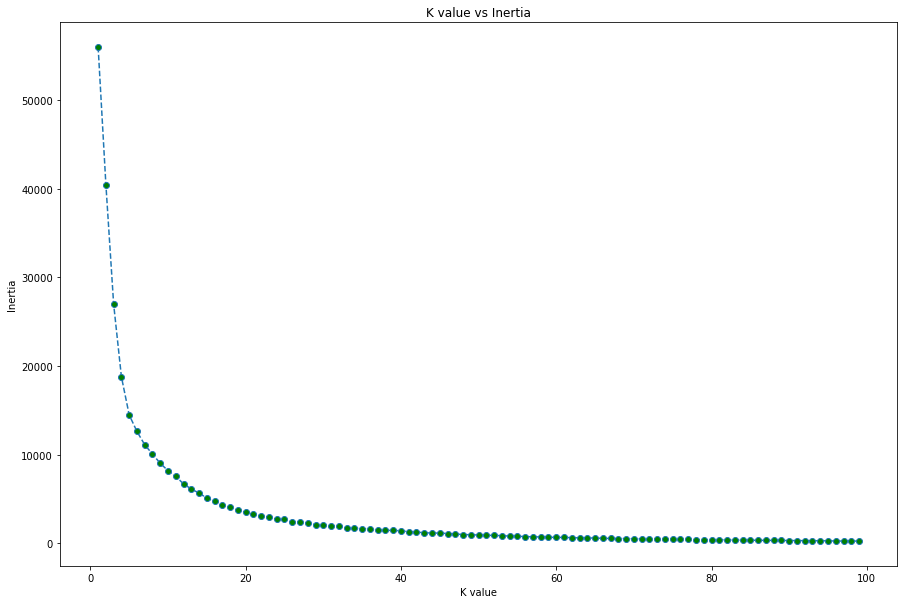

In [163]:
# Modeling with KMeans

inertia_list = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_model[['Recency','Frequency','Score']])
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize=(15,10))
plt.plot(range(1,100),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

In [164]:
from sklearn.metrics import silhouette_samples

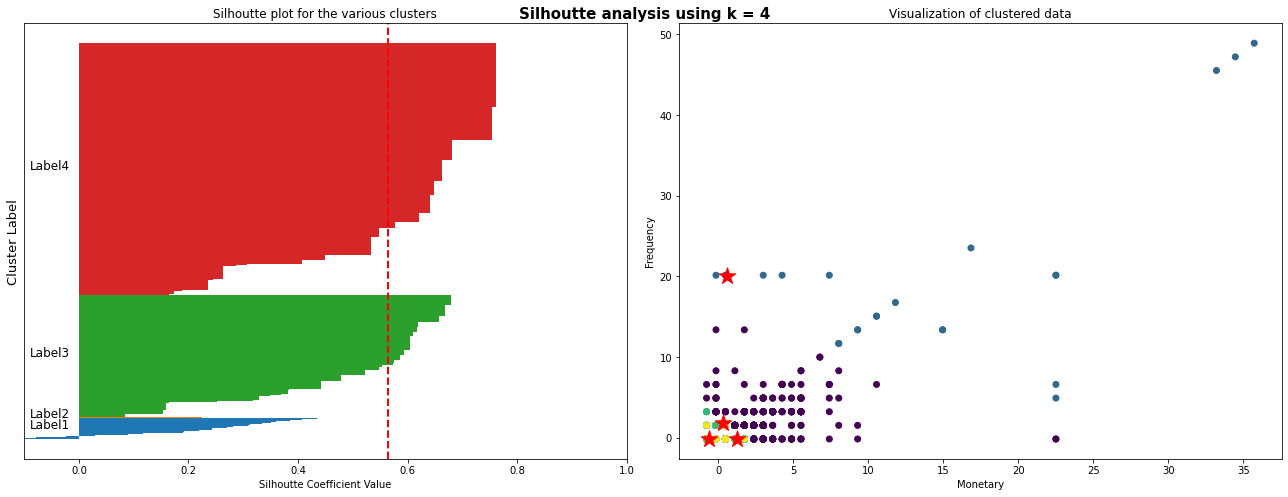

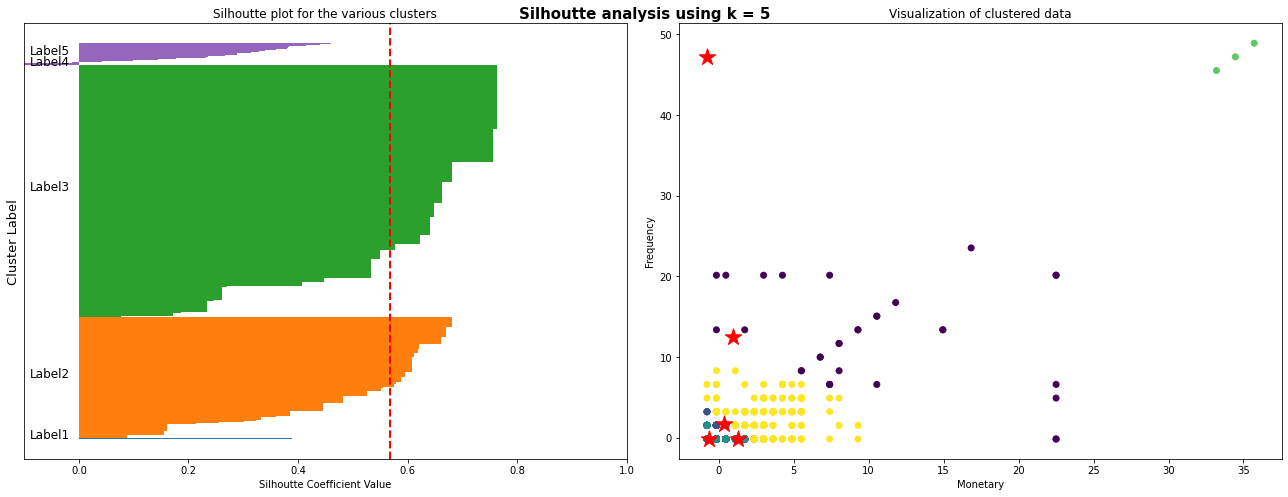

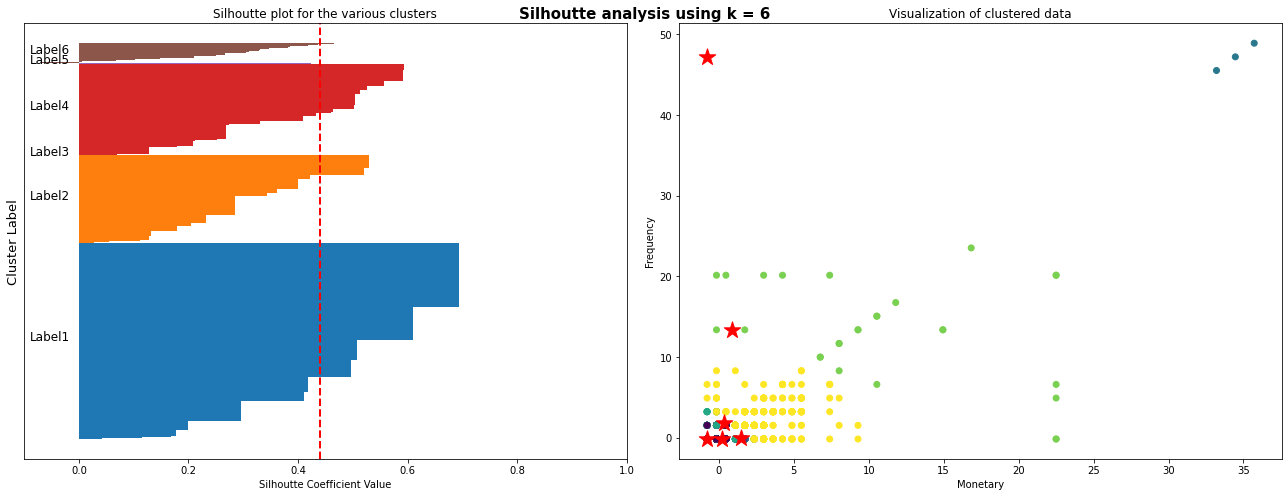

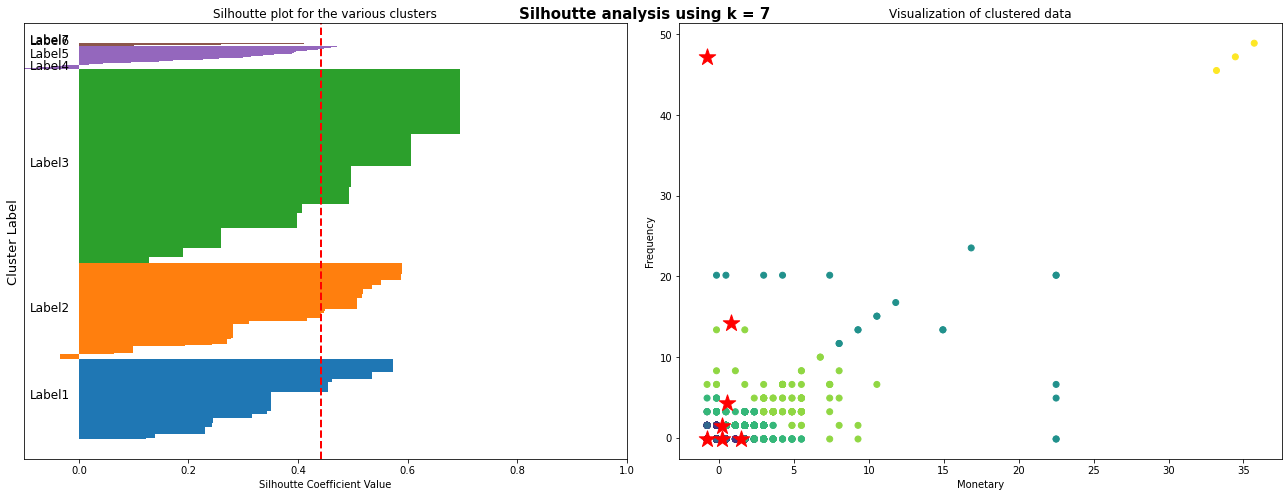

In [165]:
# Plotting possible clusters

for i,k in enumerate(list(range(4,8))):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(rfm_model[['Recency','Frequency','Score']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(rfm_model[['Recency','Frequency','Score']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        
    ## Get average silhoutte score and using plot above 
    avg_score = np.mean(silhoutte_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth = 2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1,1])
    ax1.set_xlabel('Silhoutte Coefficient Value')
    ax1.set_ylabel('Cluster Label', fontsize=13)
    ax1.set_title('Silhoutte plot for the various clusters')
    
    ## Scatter plot of data colored with labels(cluster)
    ax2.scatter(rfm_model['Score'], rfm_model['Frequency'], c=labels)
    ax2.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=300)
    ax2.set_xlabel('Monetary')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Visualization of clustered data')
    plt.suptitle('Silhoutte analysis using k = {}'.format(k),fontsize=15,fontweight='semibold')
    plt.tight_layout()
    

From silhouette anaylsis we know about best cluster with highest silhouette score (0.5671239341604932), we take **5 cluster** with highest score. So the result is segmentation customer with Kmeans is **5 cluster.** 

In [166]:
# Getting Silhoutte Score

for i,k in enumerate(list(range(4,8))):
    
    # Running Kmeans Algorithm 
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(rfm_model[['Recency','Frequency','Score']])
    centroids = km.cluster_centers_
    
    ## Get silhoutte samples 
    silhoutte_vals = silhouette_samples(rfm_model[['Recency','Frequency','Score']], labels)
    
    ## Silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        clusters_silhoutte_vals = silhoutte_vals[labels == cluster]
        clusters_silhoutte_vals.sort()
        y_upper += len(clusters_silhoutte_vals)
        ax1.barh(range(y_lower, y_upper), clusters_silhoutte_vals, height=1)
        ax1.text(-0.09,(y_lower+y_upper)/2, 'Label' + str(i+1), fontsize=12)
        y_lower += len(clusters_silhoutte_vals)
        avg_score = np.mean(silhoutte_vals)
        print(avg_score)


0.5642118171924396
0.5642118171924396
0.5642118171924396
0.5642118171924396
0.5671239341604932
0.5671239341604932
0.5671239341604932
0.5671239341604932
0.5671239341604932
0.439431185162973
0.439431185162973
0.439431185162973
0.439431185162973
0.439431185162973
0.439431185162973
0.42493258798700584
0.42493258798700584
0.42493258798700584
0.42493258798700584
0.42493258798700584
0.42493258798700584
0.42493258798700584


In [167]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(rfm_model[['Recency','Frequency','Score']])
centroids = km.cluster_centers_
silhoutte_vals = silhouette_samples(rfm_model[['Recency','Frequency','Score']], labels)

In [168]:
#Counting cluster distribution
df_Kmeans = rfm_model[['Recency','Frequency','Score']]
df_Kmeans['Labels'] = labels

df_Kmeans.groupby(['Labels']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Score' : 'mean',
    'Labels' : 'count'
})

Recency  Frequency      Score  Labels
Labels                                        
0      -0.641252  -0.145020  -0.184592   11855
1       1.259309  -0.110539  -0.085485    5748
2       0.921149  12.421265  10.344455      32
3       0.324188   1.748990   2.163110    1038
4      -0.816685  47.218599  34.458281       3

- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased

In [169]:
# Function to give cluster

def applyLevel(x):
    if x['Labels'] == 0 :
        return 'Need Activation'
    elif x['Labels'] == 1 :
        return 'Need Attention'
    elif x['Labels'] == 2 :
        return 'Loyal'
    elif x['Labels'] == 3 :
        return 'Promising'
    else :
        return 'Champions'

In [170]:
df_Kmeans['CustLevel'] = df_Kmeans.apply(applyLevel,axis=1)

In [171]:
#Showing the clusters distribution

df_Kmeans.groupby(['Labels']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Score' : 'mean',
    'Labels' : 'count'
})

Recency  Frequency      Score  Labels
Labels                                        
0      -0.641252  -0.145020  -0.184592   11855
1       1.259309  -0.110539  -0.085485    5748
2       0.921149  12.421265  10.344455      32
3       0.324188   1.748990   2.163110    1038
4      -0.816685  47.218599  34.458281       3

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must hav

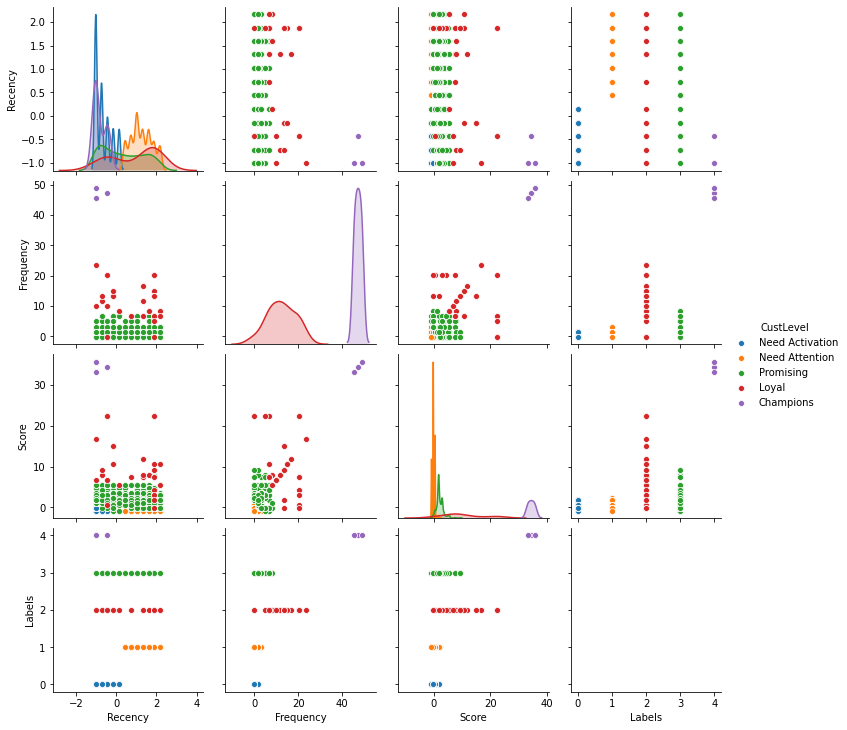

In [172]:
sns.pairplot(df_Kmeans,hue='CustLevel')

<Figure size 432x288 with 0 Axes>

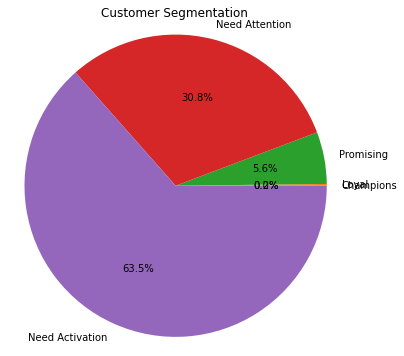

In [173]:
#Creating Nationality dataset for pieplot

datapie = df_Kmeans[['CustLevel','Score']].copy()
datapie['Count'] = 1
datapie.drop(['Score'], axis=1, inplace=True)
datapie = datapie.groupby(['CustLevel']).sum()
datapie = datapie.reset_index()

datapie10 = datapie.sort_values('Count').tail(10).copy()

fig = plt.figure()

plt.figure(figsize=(6,6))
my_data = datapie10['Count']
my_labels = datapie10['CustLevel']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.axis('equal')
# plt.savefig('custKS.png')
plt.show()

In [174]:
datapie10

CustLevel  Count
0        Champions      3
1            Loyal     32
4        Promising   1038
3   Need Attention   5748
2  Need Activation  11855

# Conclusion

As we can see from the **K-Means**, we know that **5 clusters** is the best way to cluster our RFM data. <br>
Compared to our **RFM Model** where we got **7 clusters**, at plain sight we might want to see there are 2 cluster difference, **but** if we take a closer look at our RFM model, the our top costumer only consist **0.46%** (1.2% if we count top 3), so it make sense if **KMeans cluster give 5** cluster as the best clusters.<br><br>
From the RFM model and KMeans we already did, we know the best way to segment our customer is to segment them into 5 cluster,***but*** to group the **high value customers (Opulence & Champions)** will not be a very good clustering for the loyalty program. <br>
It will deter some customer to **stop purchasing** after hitting certain amount because there are **no more tiers** to achieve.<br><br>
Both RFM and K-Means has their own advantage and disadvantage, **RFM tend to be more subjective**, but we can get a **proper model** on how to **reward our customer**.<br>
On other hand, **K-Means is objective**, but it sometime **fail to treat outlier** datas as how we want it, this kind of thing happens because **most of our customer** tend to be **one time buyer**.<br><br>
To conclude, it'd be better for us to **try both models** and **compare it** with one another, it will give us a **better understanding** on which model give **better cluster**. After knowing the **approximate of the cluster** then we can decide which model is a **better fit** for our data.<br>
In this case, I personally will **choose RFM Model** because the **manual tiering** that we can do, but I will try to **rework the model** so I can get **4/5 cluster** from that model.

**References**:
<br>
1. RFM: Fader, P. S., Hardie, B. G., & Lee, K. L. (2005). RFM and CLV: Using iso-value curves for customer base analysis. Journal of Marketing Research, 42(4), 415-430.
1. RFM: Mestiri, Sarah. Customer Segmentation using RFM Analysis. https://www.kaggle.com/sarahm/customer-segmentation-using-rfm-analysis
1. RFM & K-Means: Nurhamid, Anugrah. Data-Science-Practice. Customer Segmentation with RFM. https://github.com/Anugrahn/Data-Science-Practice/tree/master/Customer%20Segmentation%20with%20RFM
1. RFM : Putler.com. RFM Analysis For Successful Customer Segmentation. https://www.putler.com/rfm-analysis/
1. K-Means : Piech, Chris. K Means. https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

Any input/feedback/suggestion is highly appreciated! <br>
Thank you for trying this model! <br>
For further question kindly contact me via email: henryymulyana@gmail.com